                                                      MBAN 6110 S: Data Science 


                                  Group 8 : Predicting the Risk of Late Deliveries in the Supply Chain

Introduction : The dynamic nature of modern supply chains necessitates adaptation to cope with growing demands, and supply chain managers must strategize to ensure seamless operations. The confluence of factors, such as consumer expectations, diversified market channels, international intricacies, and others, poses substantial challenges across the supply chain network. This project aims to investigate critical variables sourced from various sporting goods suppliers to ascertain their potential in explaining whether orders for goods and services will be delivered to customers on schedule. 
 
Customer satisfaction stands as a paramount objective for any retailer. A well-optimized supply chain enables businesses to gain valuable insights into customer orders and their subsequent delivery timelines. Through data analysis of supply chain operations, organizations can save substantial sums by predicting and addressing late deliveries proactively, ensuring efficient services that uphold customer delivery satisfaction.

Problem Statement:
Objective:
The objective of this analysis is to develop a predictive model capable of accurately forecasting the delivery status of orders within the supply chain. The "Delivery Status" column will serve as the target variable for the model. Through the implementation of diverse machine learning algorithms, the intention is to discern underlying patterns and trends in the data, thereby gaining insights into the determinants of delayed deliveries and enhancing the overall efficiency of the supply chain.
 




Hypothesis:
Our hypothesis posits that specific features in the dataset, namely "Scheduled Days for shipping," "Shipping Mode," "Order Region", "Payment type","Order Item quantity", "order date" and "shipping date" exert a substantial influence on the delivery status of orders. 
Additionally, we expect that certain customer categories or segments may exhibit higher susceptibility to experiencing late deliveries. Moreover, we anticipate that both the chosen shipping mode and delivery location will have an impact on the order delivery time. Through the utilization of these identified insights, we can construct a model with the capability to accurately forecast delivery status and provide actionable recommendations for optimizing the supply chain process.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import f_oneway

In [7]:
ds=pd.read_csv('/Users/kanmaniratnasabapathy/Desktop/Data Science/Supply.csv',encoding='ISO-8859-1')

/var/folders/w5/2618yy093fl4880mfm607k6r0000gn/T/ipykernel_58002/2056482340.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ds=pd.read_csv('/Users/kanmaniratnasabapathy/Desktop/Data Science/Supply.csv',encoding='ISO-8859-1')


Assessing DataFrames

In [8]:
ds.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Total,Order Profit Per Order,Order Region,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date,Shipping Mode
0,DEBIT,3.0,4.0,91.25,314.64,Late delivery,1.0,73.0,Sporting Goods,Caguas,...,314.640015,91.250000,Southeast Asia,NaN,1360.0,73.0,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5.0,4.0,-249.09,311.36,Shipping on time,0.0,73.0,Sporting Goods,Caguas,...,311.359985,-249.089996,South Asia,NaN,1360.0,73.0,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4.0,4.0,-247.78,309.72,Shipping on time,0.0,73.0,Sporting Goods,San Jose,...,309.720001,-247.779999,South Asia,NaN,1360.0,73.0,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3.0,4.0,22.86,304.81,Shipping on time,0.0,73.0,Sporting Goods,Los Angeles,...,304.809998,22.860001,Oceania,NaN,1360.0,73.0,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2.0,4.0,134.21,298.25,Late delivery,1.0,73.0,Sporting Goods,Caguas,...,298.250000,134.210007,Oceania,NaN,1360.0,73.0,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180520 entries, 0 to 180519
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  float64
 2   Days for shipment (scheduled)  180519 non-null  float64
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  object 
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  float64
 7   Category Id                    180519 non-null  float64
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Fname                 180519 non-null  object 
 12  Customer Id                   

After gathering some info on the dataset, we see that there are total of 44 columns within the dataset. Majority of the data type is obejct and only a small portion is in Float format. Base on the output of info() function we see that the dataset is not perfectly complete but does not have much missing data points either, each column only contains around a very few percentage of missing data. 

In [10]:
ds.describe(include='all')

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Item Total,Order Profit Per Order,Order Region,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date,Shipping Mode
count,180519,180519.000000,180519.000000,180519.000000,180519.00,180519,180519.000000,180519.000000,180519,180519,...,180519.000000,180519.000000,180519,24840.000000,180519.000000,180519.000000,180519,180519.000000,180519,180519
unique,4,NaN,NaN,NaN,4357.00,2,NaN,NaN,50,563,...,NaN,NaN,23,NaN,NaN,NaN,118,NaN,63701,4
top,DEBIT,NaN,NaN,NaN,122.84,Shipping on time,NaN,NaN,Cleats,Caguas,...,NaN,NaN,Central America,NaN,NaN,NaN,Perfect Fitness Perfect Rip Deck,NaN,1/5/2016 5:58,Standard Class
freq,69295,NaN,NaN,NaN,1147.00,94941,NaN,NaN,24551,66770,...,NaN,NaN,28341,NaN,NaN,NaN,24515,NaN,10,107752
mean,NaN,3.497654,2.931847,21.974989,NaN,NaN,0.474066,31.851451,NaN,NaN,...,183.107609,21.974989,NaN,55426.132327,692.509764,31.851451,NaN,141.232550,NaN,NaN
std,NaN,1.623722,1.374449,104.433526,NaN,NaN,0.499328,15.640064,NaN,NaN,...,120.043670,104.433526,NaN,31919.279101,336.446807,15.640064,NaN,139.732492,NaN,NaN
min,NaN,0.000000,0.000000,-4274.980000,NaN,NaN,0.000000,2.000000,NaN,NaN,...,7.490000,-4274.979980,NaN,1040.000000,19.000000,2.000000,NaN,9.990000,NaN,NaN
25%,NaN,2.000000,2.000000,7.000000,NaN,NaN,0.000000,18.000000,NaN,NaN,...,104.379997,7.000000,NaN,23464.000000,403.000000,18.000000,NaN,50.000000,NaN,NaN
50%,NaN,3.000000,4.000000,31.520000,NaN,NaN,0.000000,29.000000,NaN,NaN,...,163.990005,31.520000,NaN,59405.000000,627.000000,29.000000,NaN,59.990002,NaN,NaN
75%,NaN,5.000000,4.000000,64.800000,NaN,NaN,1.000000,45.000000,NaN,NaN,...,247.399994,64.800003,NaN,90008.000000,1004.000000,45.000000,NaN,199.990005,NaN,NaN


In order to have a basic understanding of what the data looks like, we have applied the describe() function with include=all, since we do have categorical variables. Here are some findings that we have observed:

- Payment method consists of 4 different types and DEBIT transaction is the most frequently used method. 
- For delivery status, most orders have arrived on time. 
- Customer city contains 563 unique values and most customer lives in Caguas city. 
- Product Name contains 118 unique values and the most common product is perfect fitness perfect rip deck. 
- For product price, the mean value is around 141 whereas the median value is 59, which might not indicate a normal distribution.

We will be using more histograms and plots later on in order to further investigate the trend, distribution and skewness. 

In [91]:
len(ds)

180519

In [12]:
ds.shape

(180520, 44)

In [13]:
num_columns = len(ds.columns)
print(num_columns)

44


Exploratory Data Analysis 

DATA CLEANING 

In [14]:
# List of columns to drop
columns_to_drop = ['Customer Zipcode','Customer Password','Benefit per order','Category Id', 'Category Name','Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
                   'Department Id','Order Zipcode','Customer Street'
                   ,'Product Category Id',
                   'Customer Fname','Customer Lname',
                   'Order City']

# Dropping the specified columns from the DataFrame
ds= ds.drop(columns=columns_to_drop)


Drop empty columns and columns that are not so relevant. Zipcode related columns are mostly null values which can be dropped. Customer email and password do not contain any meaningful values. Product image is also a null column. Latitude, longitude and other ID's do not contain much meaningful values, so these are also dropped as well. Some columns have very high similarities with other columns, such as sales per customer versus sales. So we are reducing these columns and keep columns that are easier for future analysis. We are using Customer ID to identify each customer hence we will be dropping customer full name. For geographical related properties, such as region, state, country. We are keeping country since its a more general representation. 

In [15]:
print(ds.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order Country',
       'Order Customer Id', 'order date', 'Order Id', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Product Card Id',
       'Product Name', 'Product Price', 'shipping date', 'Shipping Mode'],
      dtype='object')


In [16]:
ds.isnull().sum()

Type                             1
Days for shipping (real)         1
Days for shipment (scheduled)    1
Sales per customer               1
Delivery Status                  1
Late_delivery_risk               1
Department Name                  1
Latitude                         1
Longitude                        1
Market                           1
Order Country                    1
Order Customer Id                1
order date                       1
Order Id                         1
Order Item Id                    1
Order Item Product Price         1
Order Item Profit Ratio          1
Order Item Quantity              1
Sales                            1
Order Item Total                 1
Order Profit Per Order           1
Order Region                     1
Product Card Id                  1
Product Name                     1
Product Price                    1
shipping date                    1
Shipping Mode                    1
dtype: int64

In [87]:

ds.dropna(inplace=True)


In [88]:
ds.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order Country                    0
Order Customer Id                0
order date                       0
Order Id                         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Product Card Id                  0
Product Name                     0
Product Price                    0
shipping date                    0
Shipping Mode                    0
shipping_day                     0
shipping_month      

In [17]:
ds.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order Country',
       'Order Customer Id', 'order date', 'Order Id', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Product Card Id',
       'Product Name', 'Product Price', 'shipping date', 'Shipping Mode'],
      dtype='object')

                                                              FEATURE ENGINEERING 

Extracting the day , month and year from order date and shipping date and creating new columns to save them 

In [18]:
# Converting the "shipping date" and "order date" columns to pandas datetime format
ds['shipping date'] = pd.to_datetime(ds['shipping date'])
ds['order date'] = pd.to_datetime(ds['order date'])

# Extracting day, month, and year from "shipping date"
ds['shipping_day'] = ds['shipping date'].dt.day
ds['shipping_month'] = ds['shipping date'].dt.month
ds['shipping_year'] = ds['shipping date'].dt.year

# Extracting  day, month, and year from "order date"
ds['order_day'] = ds['order date'].dt.day
ds['order_month'] = ds['order date'].dt.month
ds['order_year'] = ds['order date'].dt.year


VISUALIZATIONS & DESCRIPTIVE STATISTICS 

In [74]:
# univariate analysis -Checking the output variable to  ensure it's balanced
ds.groupby('Delivery Status').count()

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Department Name,Latitude,Longitude,Market,Order Country,...,Product Name,Product Price,shipping date,Shipping Mode,shipping_day,shipping_month,shipping_year,order_day,order_month,order_year
Delivery Status,,,,,,,,,,,,,,,,,,,,,
Late delivery,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578,...,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578
Shipping on time,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941,...,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941


In [20]:

ds['Delivery Status'].count()

180519

In [21]:
ds.groupby('Late_delivery_risk').count()

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Department Name,Latitude,Longitude,Market,Order Country,...,Product Name,Product Price,shipping date,Shipping Mode,shipping_day,shipping_month,shipping_year,order_day,order_month,order_year
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,
0.0,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941,...,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941
1.0,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578,...,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578


In [22]:
# Convert 'Sales per customer' column to numeric (float)
ds['Sales per customer'] = pd.to_numeric(ds['Sales per customer'], errors='coerce')

# Handling missing values (NaN) if any  by filling with the mean
ds['Sales per customer'].fillna(ds['Sales per customer'].mean(), inplace=True)

# Converting  the column to integers after rounding
ds['Sales per customer'] = ds['Sales per customer'].round().astype(int)


<Axes: xlabel='Order Item Quantity', ylabel='Count'>

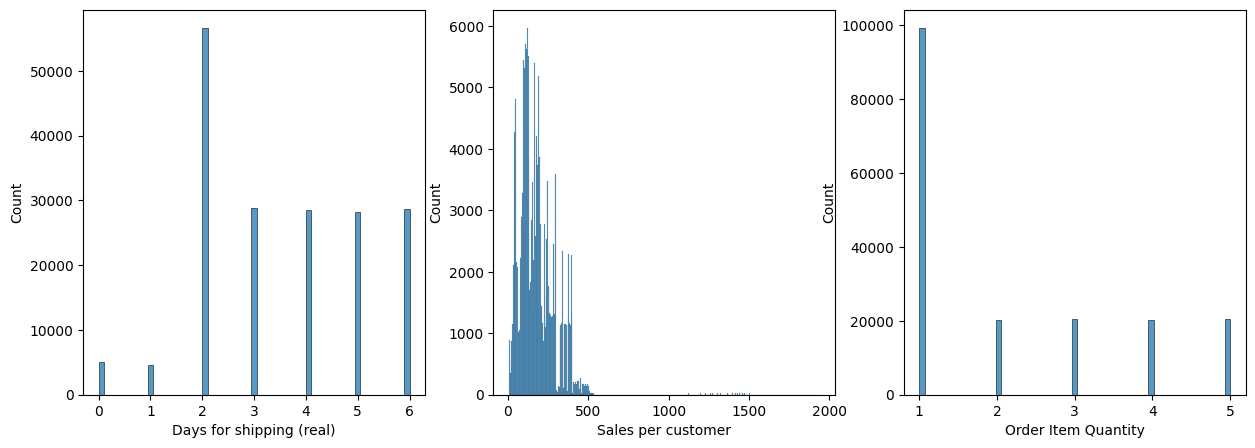

In [23]:
# checking continuous variables first with predictor 

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(ds['Days for shipping (real)'], ax=ax1)
sns.histplot(ds['Sales per customer'], ax=ax2)
sns.histplot(ds['Order Item Quantity'], ax=ax3)

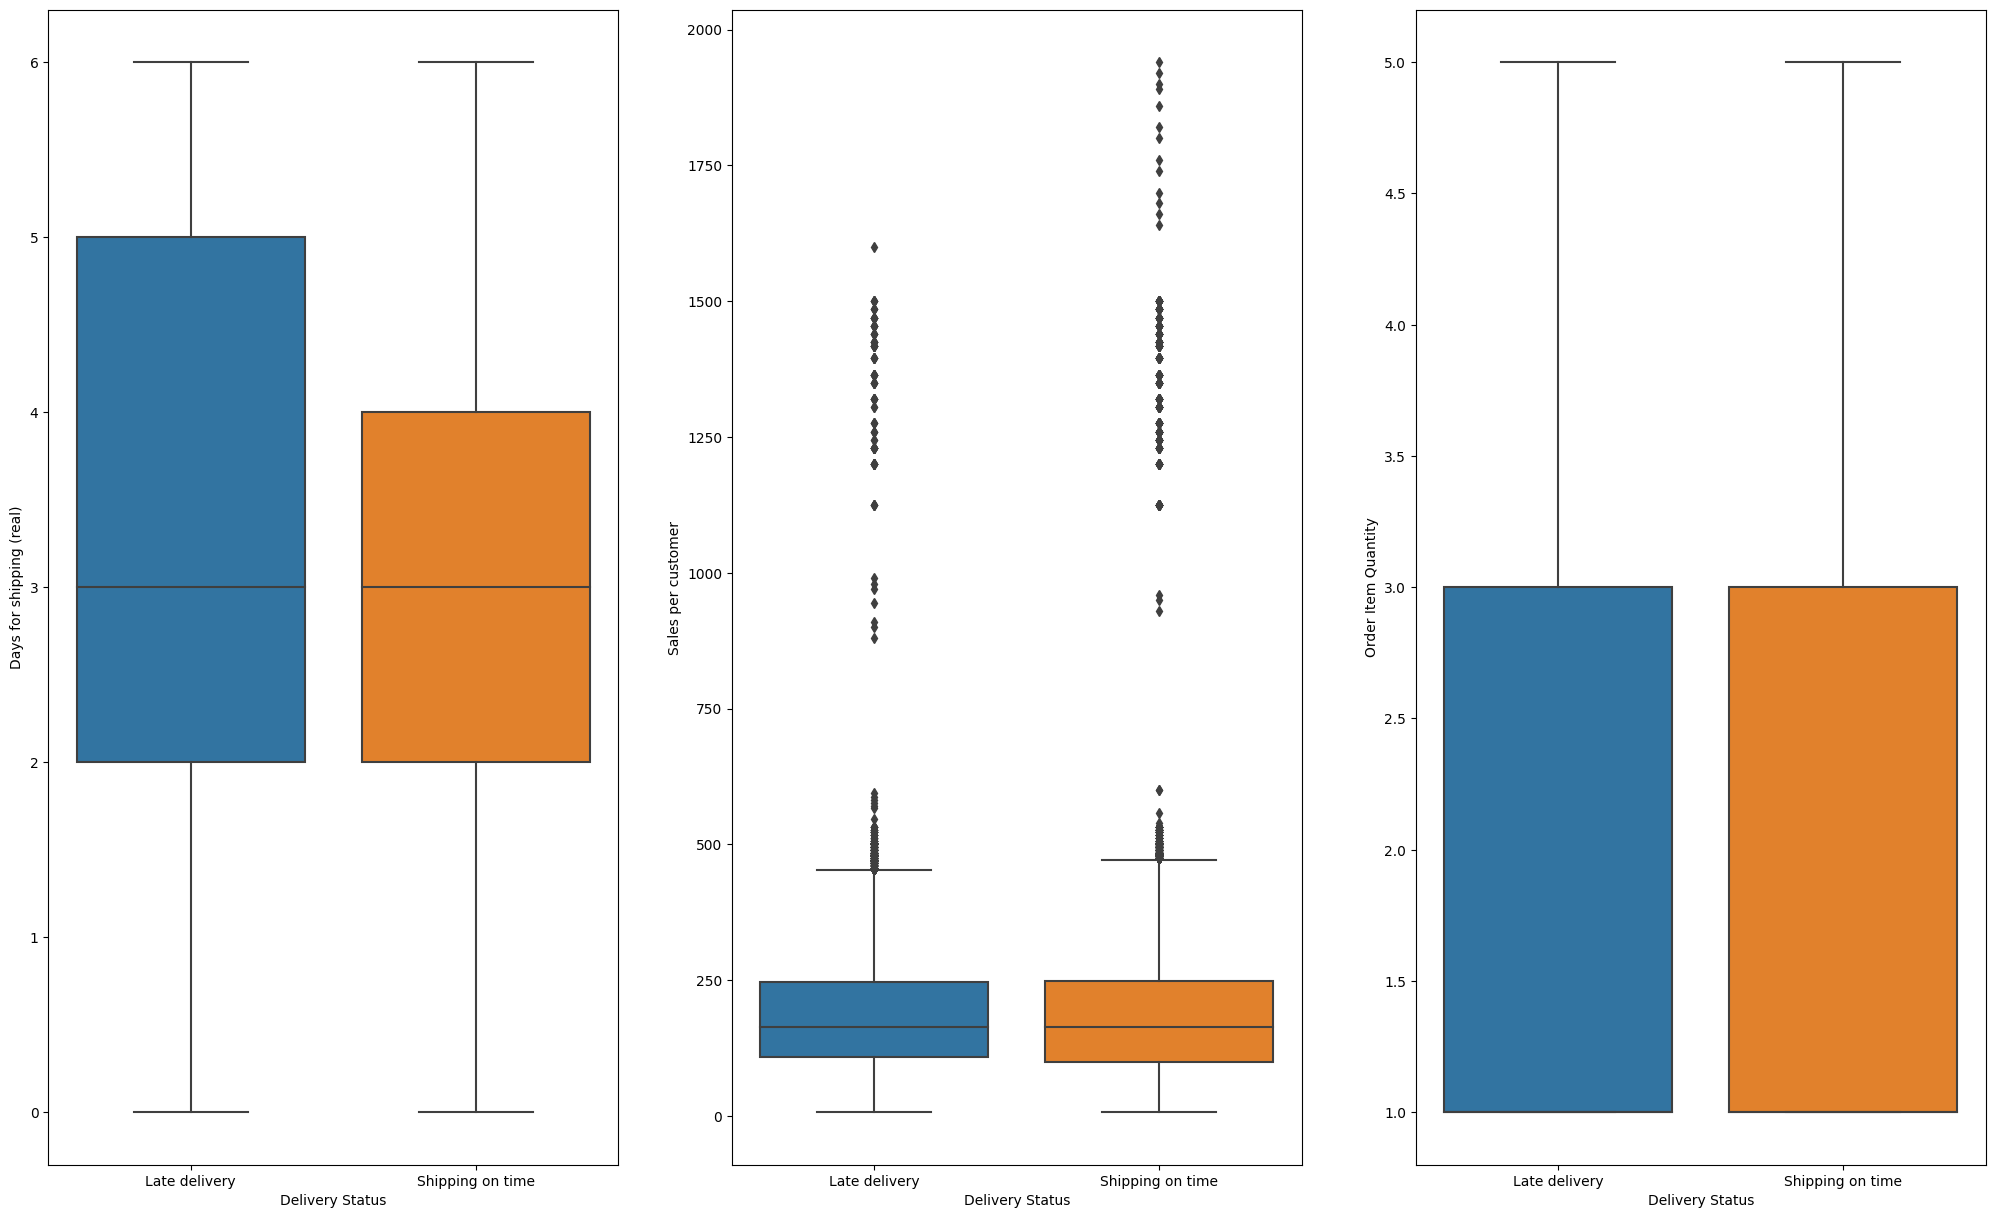

In [24]:
# Create the subplots and plot the boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,15))
sns.boxplot(x='Delivery Status', y='Days for shipping (real)', data=ds, ax=ax1)
sns.boxplot(x='Delivery Status', y='Sales per customer', data=ds, ax=ax2)
sns.boxplot(x='Delivery Status', y='Order Item Quantity', data=ds, ax=ax3)

plt.show()

Generating   boxplots for the  numerical variables to better understand the IQR and identify outliers. 

In [25]:
ds.groupby('Delivery Status').count()

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Department Name,Latitude,Longitude,Market,Order Country,...,Product Name,Product Price,shipping date,Shipping Mode,shipping_day,shipping_month,shipping_year,order_day,order_month,order_year
Delivery Status,,,,,,,,,,,,,,,,,,,,,
Late delivery,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578,...,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578
Shipping on time,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941,...,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941


In [26]:
ds.groupby('Late_delivery_risk').count()

,Type,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Department Name,Latitude,Longitude,Market,Order Country,...,Product Name,Product Price,shipping date,Shipping Mode,shipping_day,shipping_month,shipping_year,order_day,order_month,order_year
Late_delivery_risk,,,,,,,,,,,,,,,,,,,,,
0.0,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941,...,94941,94941,94941,94941,94941,94941,94941,94941,94941,94941
1.0,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578,...,85578,85578,85578,85578,85578,85578,85578,85578,85578,85578


In [27]:
ds['Late_delivery_risk'].value_counts()

Late_delivery_risk
0.0    94941
1.0    85578
Name: count, dtype: int64

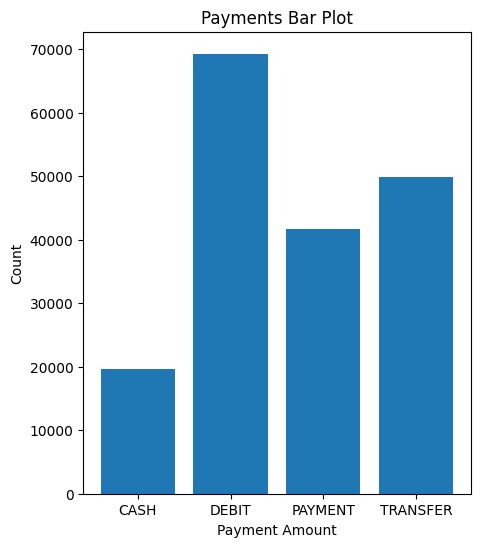

In [28]:
# Extracting the "payments" column from the DataFrame
payments_data = ds["Type"]

# Calculate the frequency/count of each payment value
payment_counts = payments_data.value_counts()

# Sort the counts in ascending order based on the payment values
payment_counts = payment_counts.sort_index()

# Set the figure size
plt.figure(figsize=(5, 6))

# Create the bar plot
plt.bar(payment_counts.index, payment_counts.values)

# Set the title and axis labels
plt.title("Payments Bar Plot")
plt.xlabel("Payment Amount")
plt.ylabel("Count")

# Show the plot
plt.show()


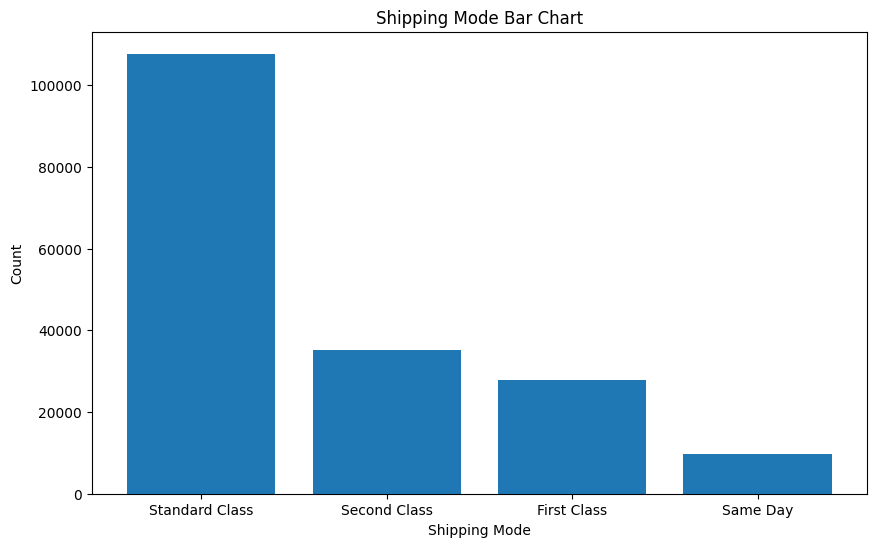

In [29]:
# Extract the "Shipping mode" column from the DataFrame
shipping_mode_data = ds["Shipping Mode"]

# Calculate the frequency/count of each shipping mode
shipping_mode_counts = shipping_mode_data.value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(shipping_mode_counts.index, shipping_mode_counts.values)

# Set the title and axis labels
plt.title("Shipping Mode Bar Chart")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")

# Show the plot
plt.show()


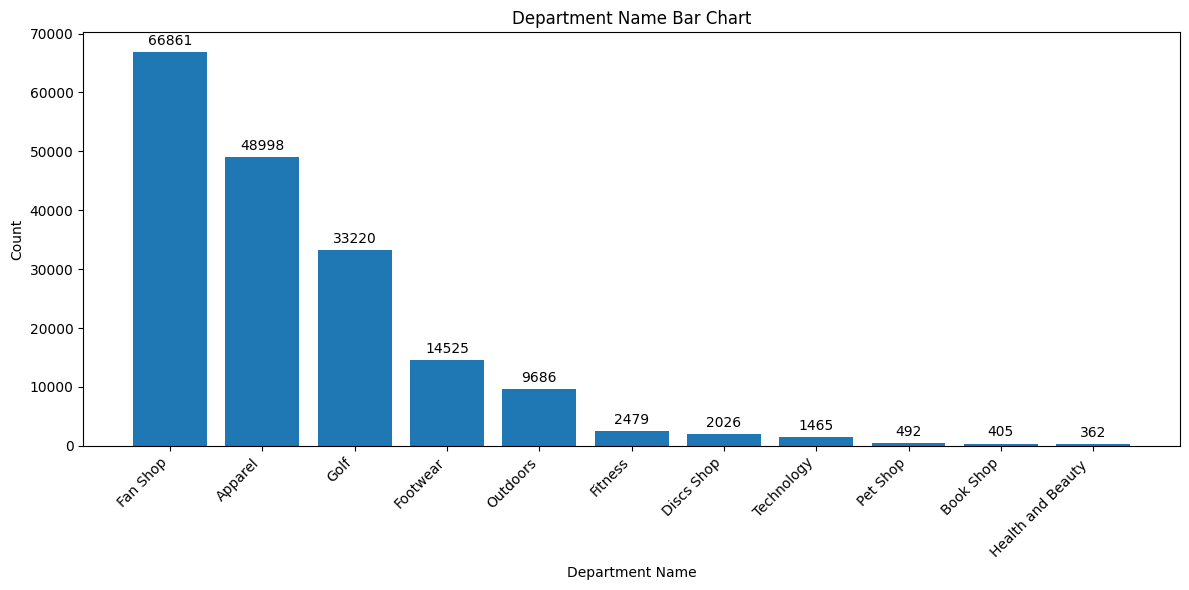

In [30]:
# Extract the "Department Name" column from the DataFrame
department_data = ds["Department Name"]

# Calculate the frequency/count of each department
department_counts = department_data.value_counts()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
bars = plt.bar(department_counts.index, department_counts.values)

# Set the title and axis labels
plt.title("Department Name Bar Chart")
plt.xlabel("Department Name")
plt.ylabel("Count")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Add the count of each department on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


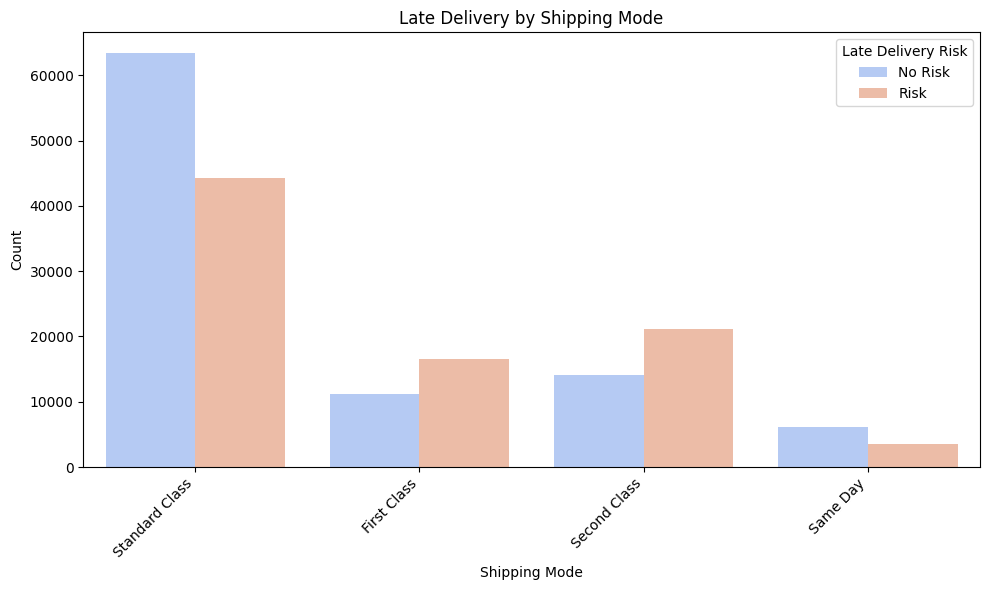

In [31]:
# Create a bar plot for late delivery with shipping mode
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='Shipping Mode', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


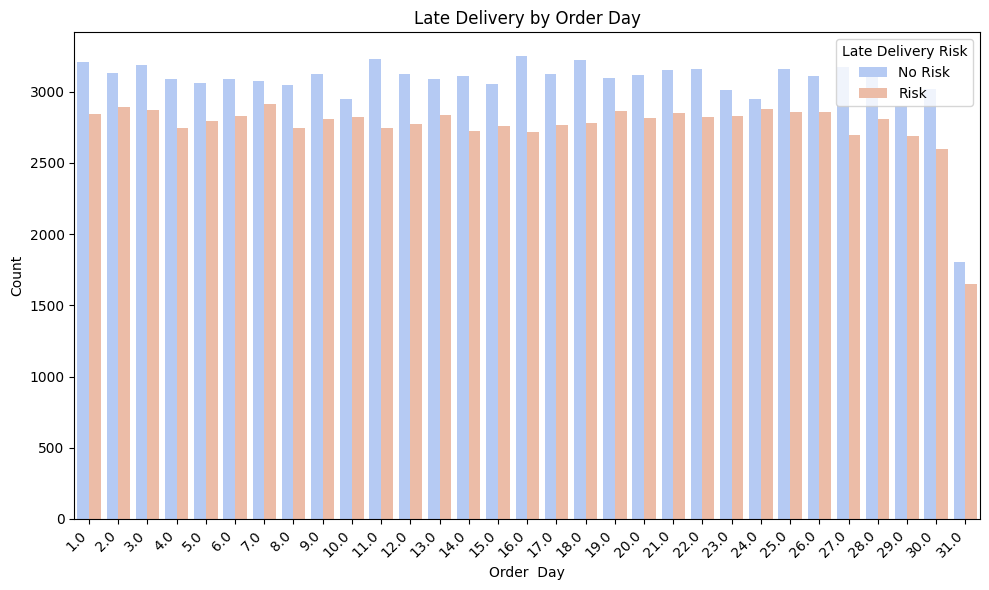

In [80]:
# Create a bar plot for late delivery with order  day
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='order_day', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Order Day')
plt.xlabel('Order  Day')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


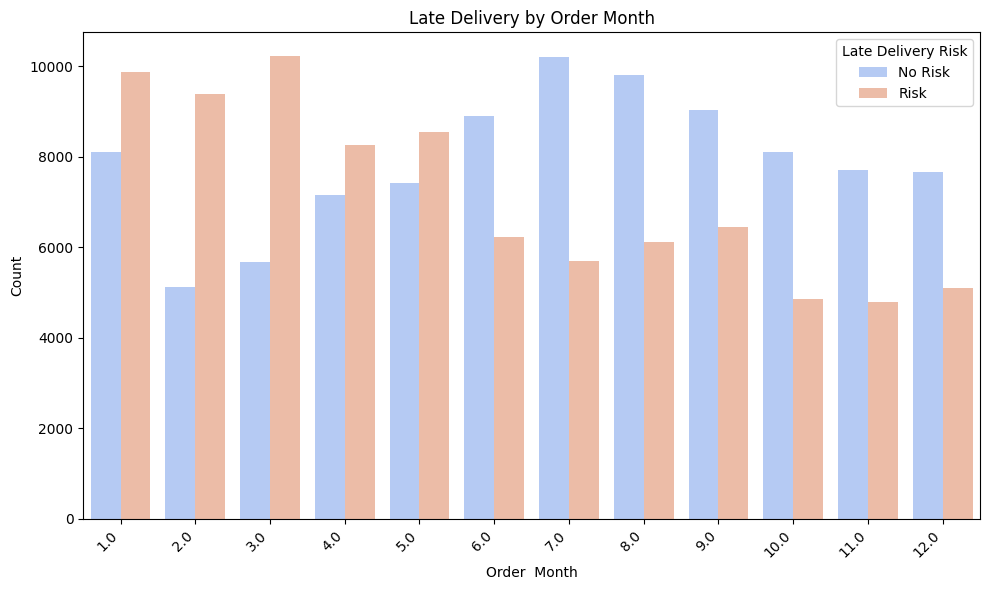

In [82]:
# Create a bar plot for late delivery with order  month
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='order_month', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Order Month')
plt.xlabel('Order  Month')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


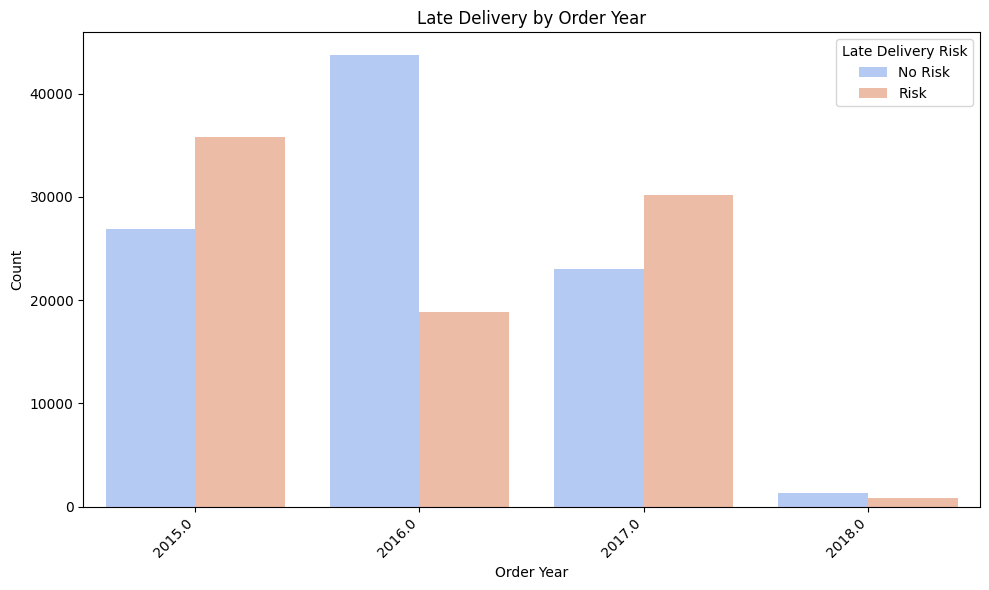

In [83]:
# Create a bar plot for late delivery with shipping mode
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='order_year', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Order Year')
plt.xlabel('Order Year')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


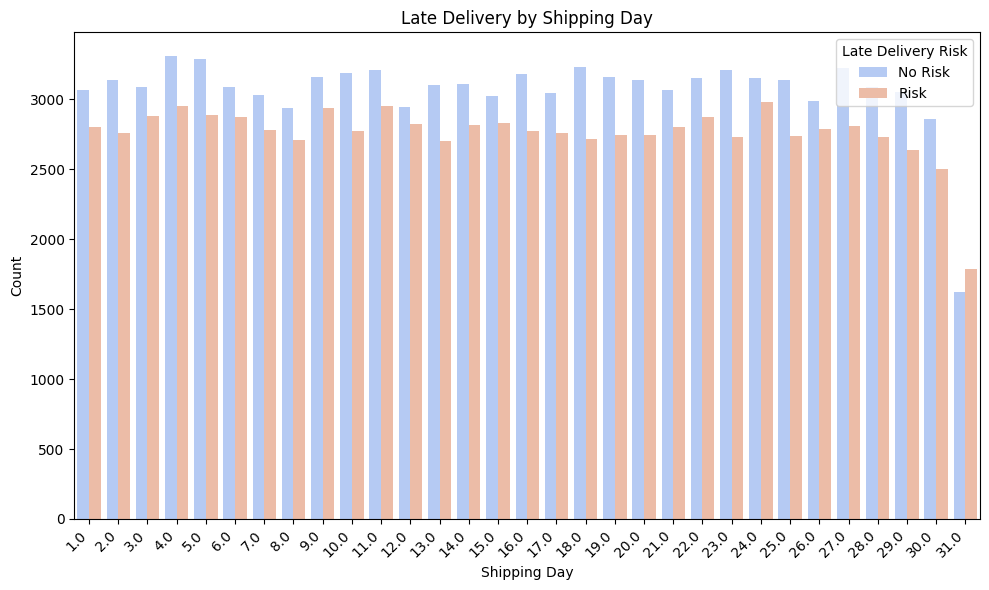

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='shipping_day', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Shipping Day')
plt.xlabel('Shipping Day')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


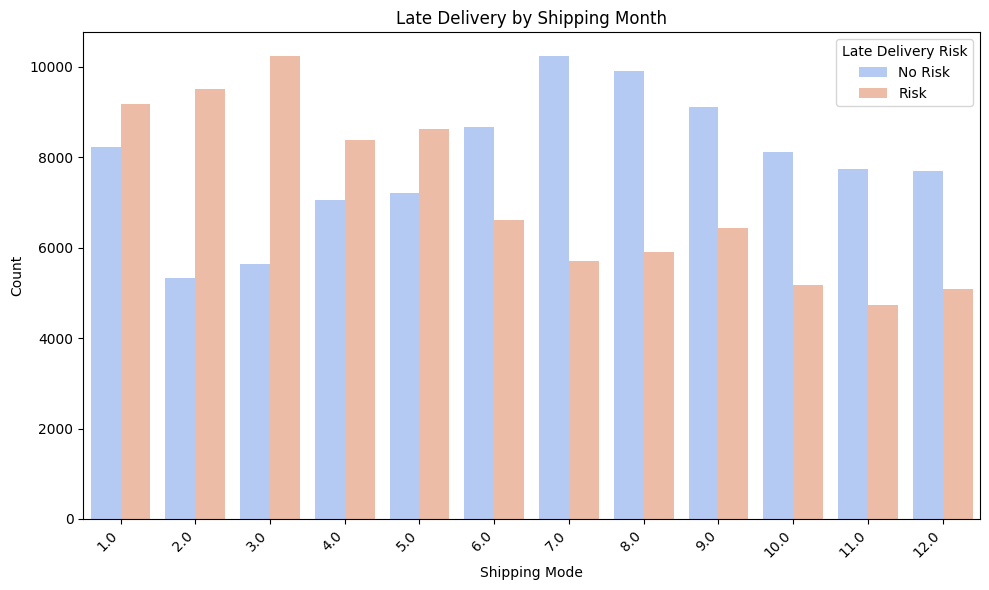

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='shipping_month', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Shipping Month')
plt.xlabel('Shipping Month')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


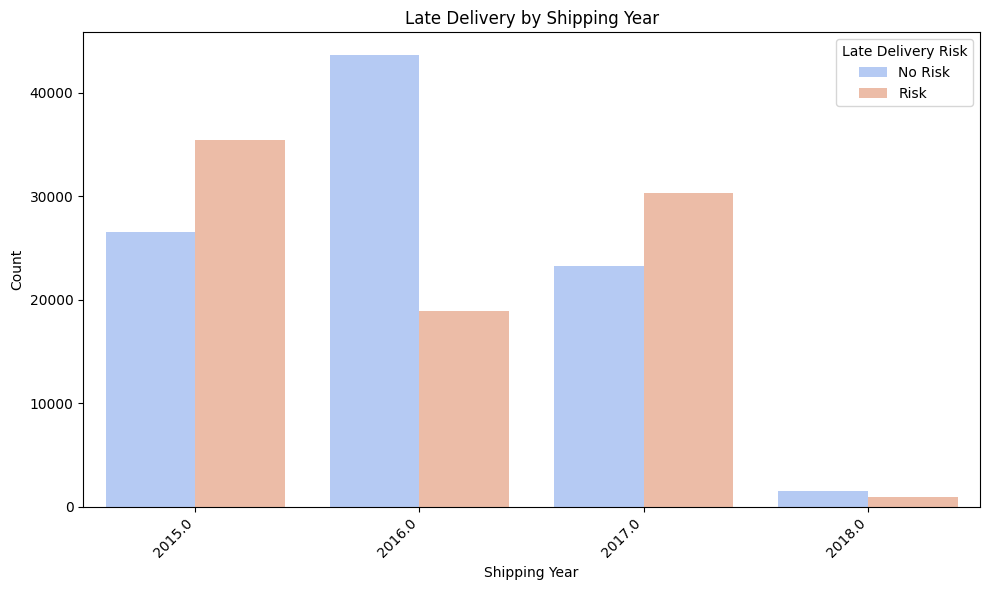

In [86]:

plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='shipping_year', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Shipping Year')
plt.xlabel('Shipping Year')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [97]:
ds.groupby(['Order Region','Late_delivery_risk'])['Order Id'].count().unstack()

Late_delivery_risk,0.0,1.0
Order Region,,
Canada,792,167
Caribbean,2334,5984
Central Africa,1329,348
Central America,7725,20616
Central Asia,304,249
East Africa,1440,412
East of USA,5861,1054
Eastern Asia,3971,3309
Eastern Europe,2170,1750


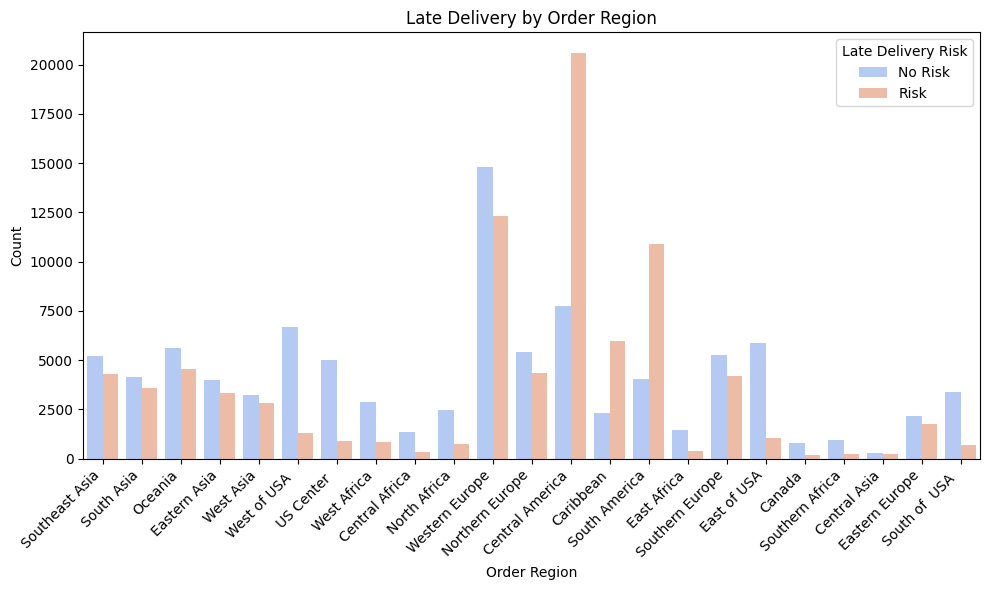

In [95]:

plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='Order Region', hue='Late_delivery_risk', palette='coolwarm')
plt.title('Late Delivery by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'Risk'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Statistical Testing 

In [32]:

from scipy.stats import chi2_contingency

# Creating a contingency table for the Delivery Status and Department Name
contingency_table = pd.crosstab(ds['Delivery Status'], ds['Department Name'])

# Perform the chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 1709.9048811701196
P-value: 0.0
Degrees of Freedom: 10
Expected Frequencies Table:
[[23228.30751334   191.99690891   960.458611   31696.55636249
   1175.21070912  6885.81506656 15748.48719525   171.61205192
   4591.80755488   233.24068935   694.50733718]
 [25769.69248666   213.00309109  1065.541389   35164.44363751
   1303.78929088  7639.18493344 17471.51280475   190.38794808
   5094.19244512   258.75931065   770.49266282]]


Since the p-value (0.5369) is greater than the typical significance level of 0.05 (commonly used in hypothesis testing), we fail to reject the null hypothesis. This means that there is no significant evidence to suggest that there is an association between the "Delivery_Status" and "Department_Name" variables in the dataset.

In [33]:

# Create a contingency table for the Delivery Status and Shipping mode
contingency_table = pd.crosstab(ds['Delivery Status'], ds['Shipping Mode'])

# Perform the chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 6075.336432790942
P-value: 0.0
Degrees of Freedom: 3
Expected Frequencies Table:
[[13185.6840111   4615.98494341 16694.72381301 51081.60723248]
 [14628.3159889   5121.01505659 18521.27618699 56670.39276752]]


The output  shows the results of a chi-square test between the two categorical variables "Delivery Status" and "Shipping Mode." Let's interpret each part of the result:

1. **Chi-Square Statistic:** The chi-square statistic is a numerical value that measures the discrepancy between the observed frequencies and the expected frequencies in the contingency table. In this case, the chi-square statistic is approximately 55782.48.

2. **P-value:** The p-value is a probability value that assesses the strength of evidence against the null hypothesis. In the context of the chi-square test, the null hypothesis states that there is no significant association between the two categorical variables being tested. The p-value you obtained is 0.0, which means it is effectively zero.

3. **Degrees of Freedom:** The degrees of freedom represent the number of categories minus one. In this test, there are 9 degrees of freedom.

4. **Expected Frequencies Table:** The expected frequencies table is a matrix of the same shape as the contingency table. It shows the expected frequencies for each cell in the contingency table under the assumption that there is no association between the variables. The values in this table are calculated based on the total frequencies of each category and the assumption of independence.

Interpretation:

With a p-value of 0.0 (or effectively zero), we can conclude that there is a significant association between the "Delivery Status" and "Shipping Mode" variables in the dataset. The chi-square test found strong evidence to reject the null hypothesis, indicating that there is a statistically significant relationship between the two categorical variables.

In simpler terms, the results suggest that the delivery status and shipping mode are not independent of each other; they are related, and changes in one variable may affect the distribution of the other variable. The chi-square statistic being quite large further supports the strong association between these two categorical variables.

In [34]:
# Create a contingency table for the Delivery Status and order region
contingency_table = pd.crosstab(ds['Delivery Status'], ds['Order Region'])

# Perform the chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 26683.30162867021
P-value: 0.0
Degrees of Freedom: 22
Expected Frequencies Table:
[[  454.62971765  3943.28466256   795.00942283 13435.51702591
    262.15874229   877.97105014  3278.16944477  3451.20369601
   1858.3404517   1532.18273977  4642.05859771  4810.82625098
   7080.18230768  3665.00766124  1917.59875692  4522.11978794
    548.49487312  4470.92061223  2790.82914264  1752.14956874
   2848.66524853  3789.21306898 12851.46716966]
 [  504.37028235  4374.71533744   881.99057717 14905.48297409
    290.84125771   974.02894986  3636.83055523  3828.79630399
   2061.6595483   1699.81726023  5149.94140229  5337.17374902
   7854.81769232  4065.99233876  2127.40124308  5016.88021206
    608.50512688  4960.07938777  3096.17085736  1943.85043126
   3160.33475147  4203.78693102 14257.53283034]]


With a very small p-value (3.912e-23), we can conclude that there is a highly significant association between the "Delivery Status" and "Order Region" variables in the dataset. The chi-square test found strong evidence to reject the null hypothesis, indicating that there is a statistically significant relationship between the two categorical variables.

In simpler terms, the results suggest that the delivery status and order region are not independent of each other; they are related, and changes in one variable may affect the distribution of the other variable. The chi-square statistic being relatively large further supports the strong association between these two categorical variables.

In summary, the chi-square test indicates that there is a significant relationship between the delivery status and order region in the data.

In [35]:
# Create a contingency table for the Delivery Status and payment Type
contingency_table = pd.crosstab(ds['Delivery Status'], ds['Type'])

# Perform the chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 14.349780402260254
P-value: 0.002465712745346642
Degrees of Freedom: 3
Expected Frequencies Table:
[[ 9299.28732156 32850.43408173 19780.42228242 23647.85631429]
 [10316.71267844 36444.56591827 21944.57771758 26235.14368571]]


With a p-value of 0.0 (or effectively zero), we can conclude that there is a highly significant association between the "Delivery Status" and "Type" variables in the dataset. The chi-square test found strong evidence to reject the null hypothesis, indicating that there is a statistically significant relationship between the two categorical variables.

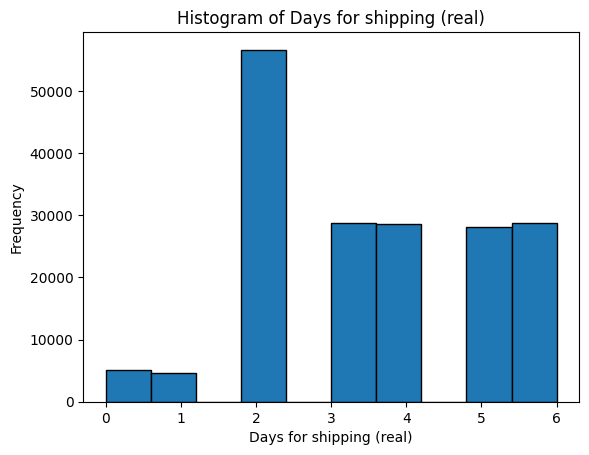

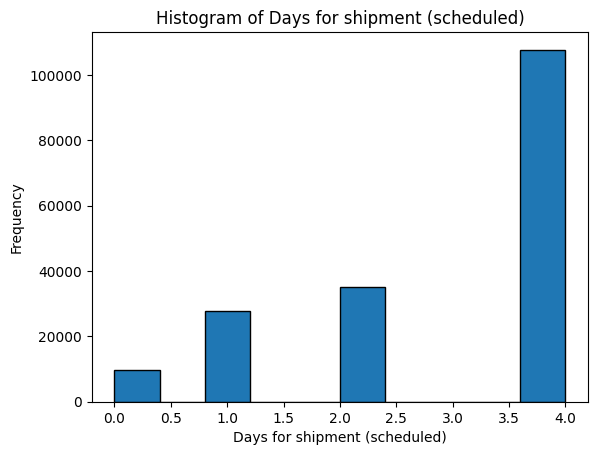

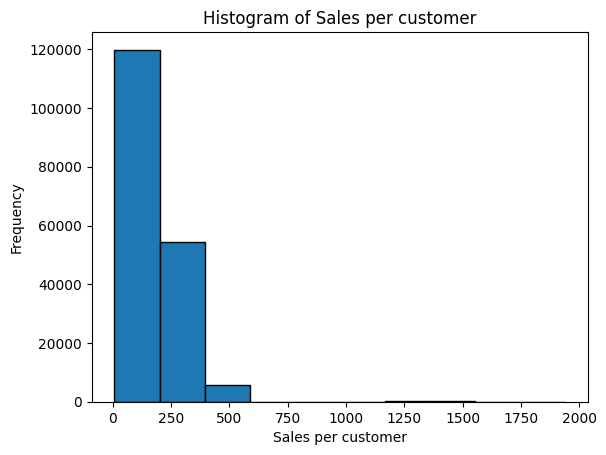

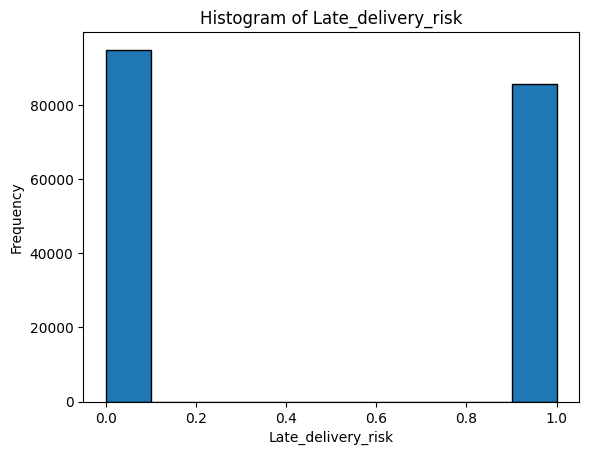

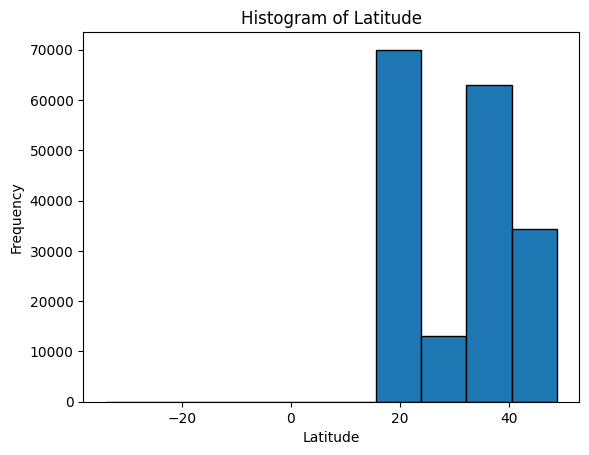

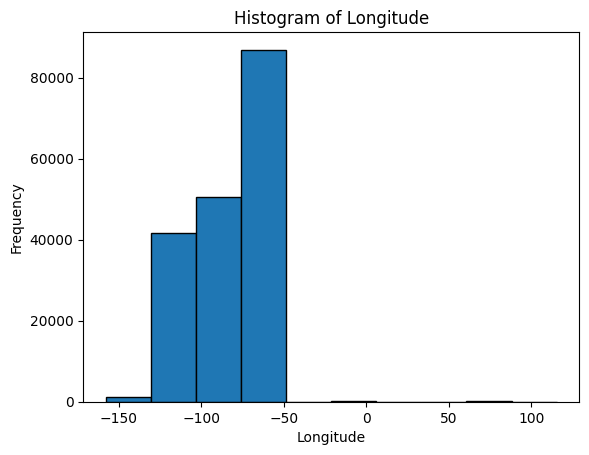

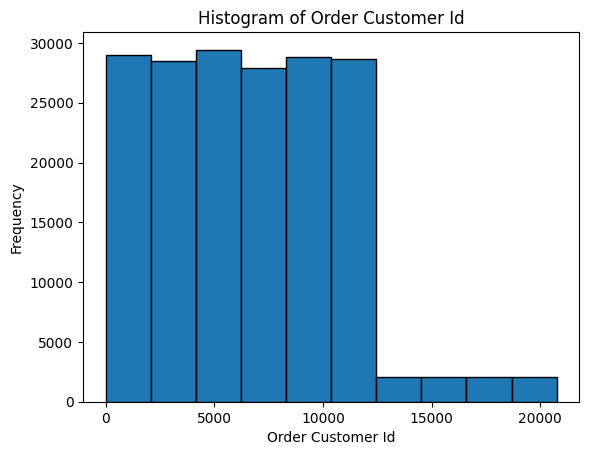

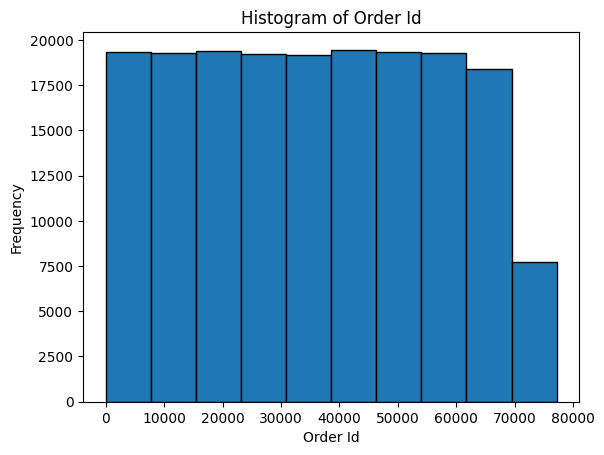

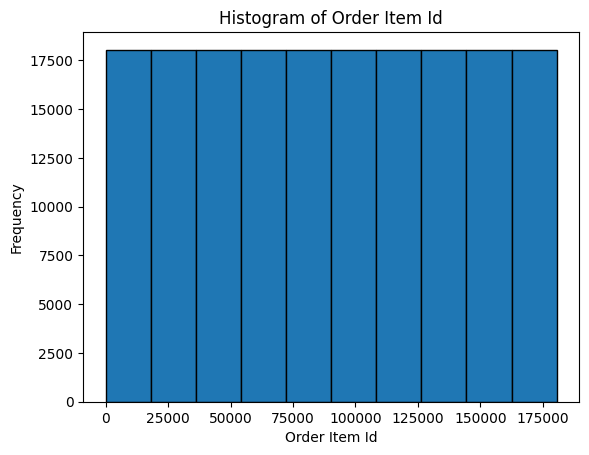

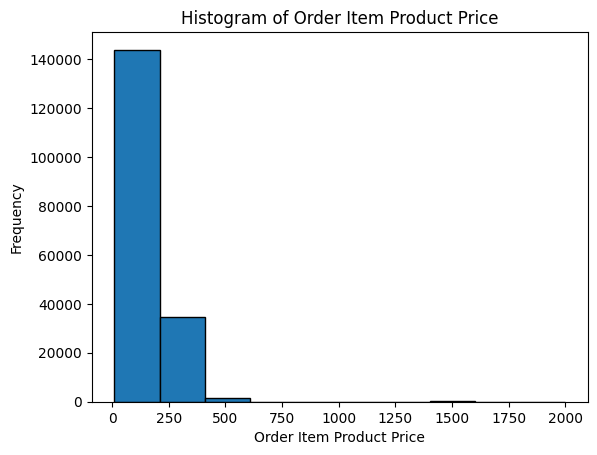

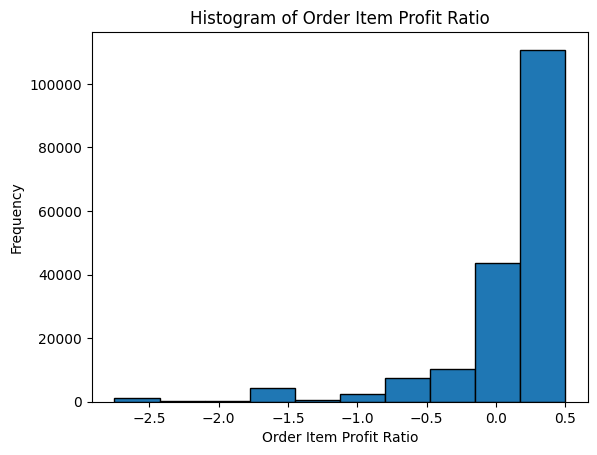

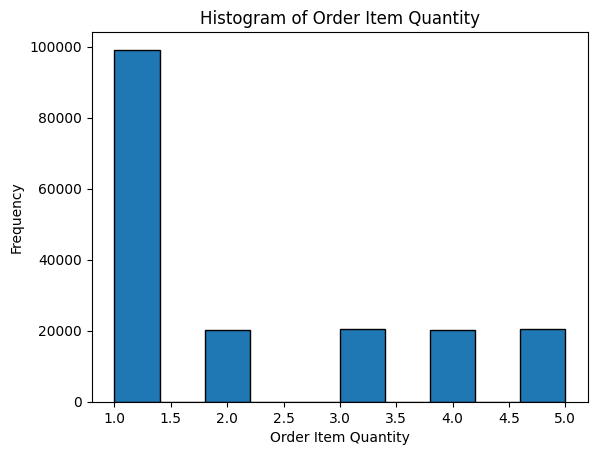

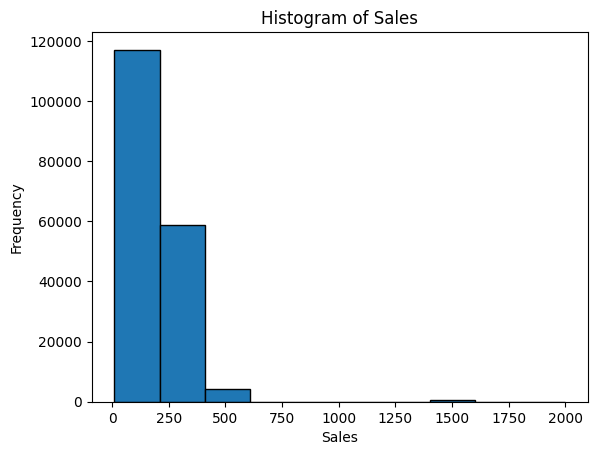

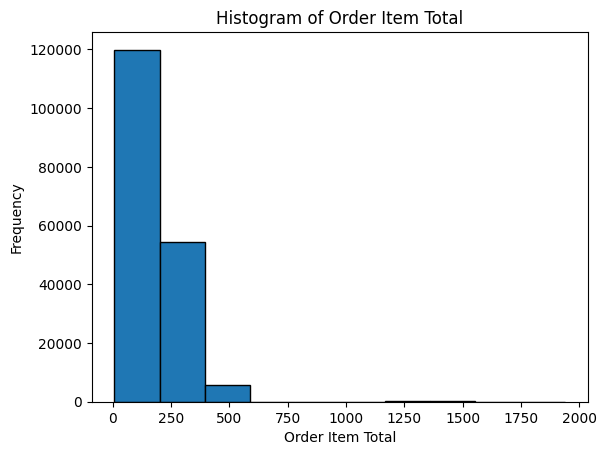

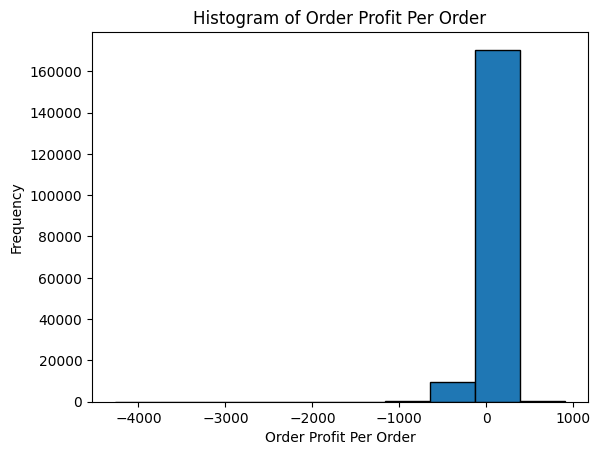

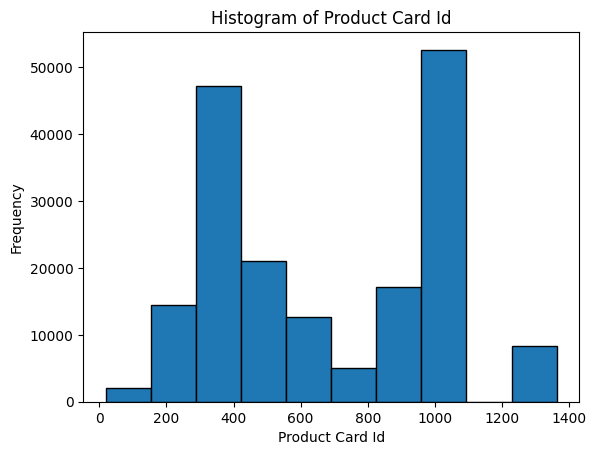

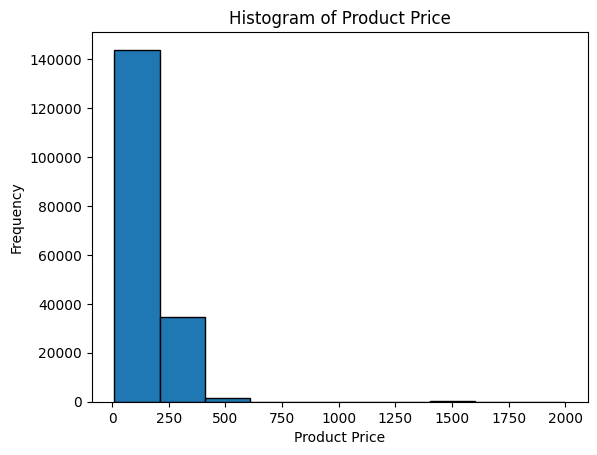

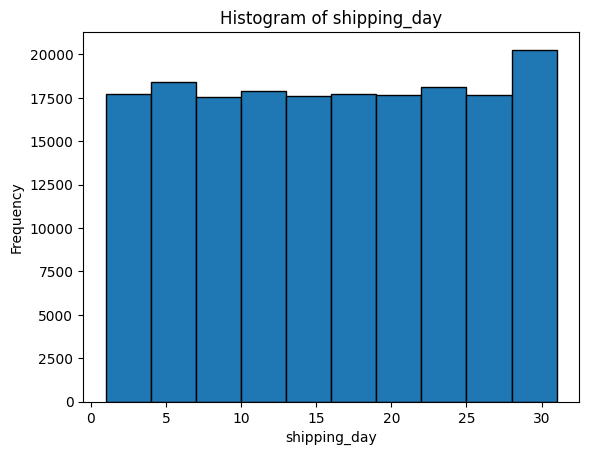

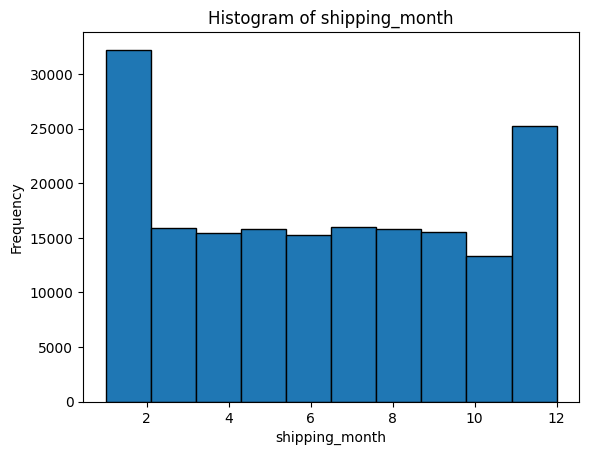

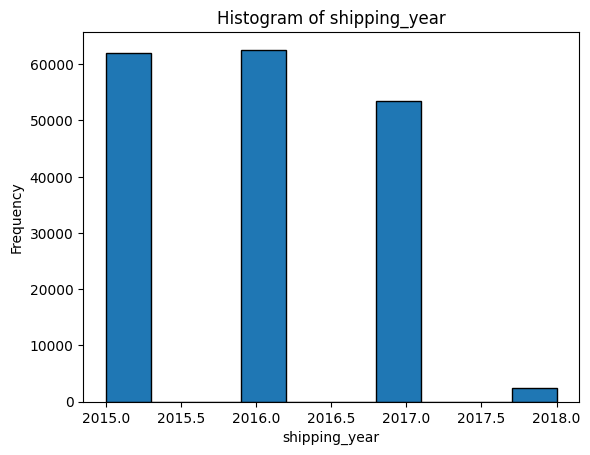

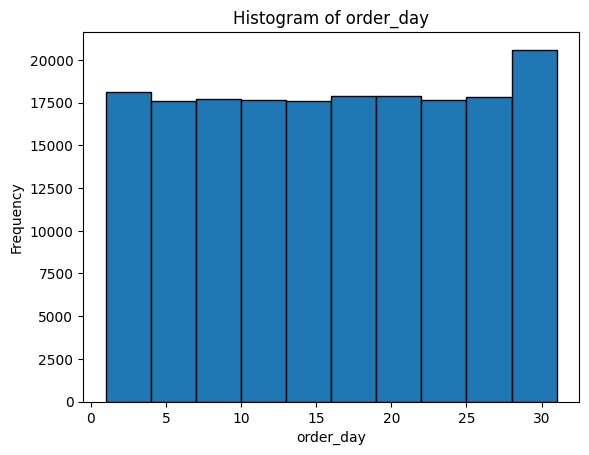

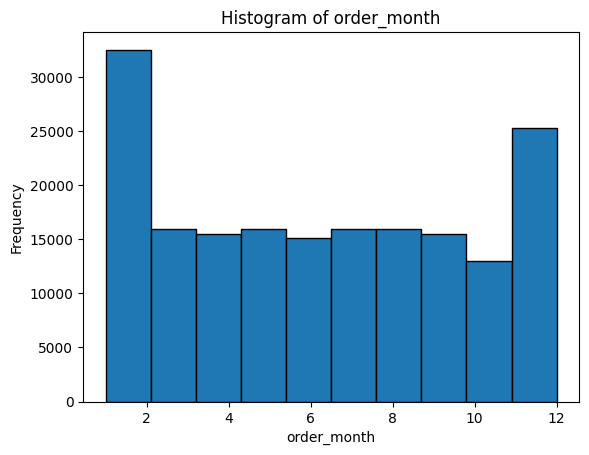

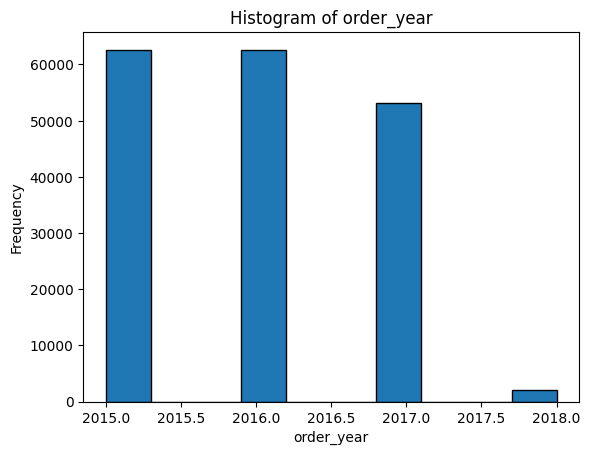

In [36]:
# Get all the numeric columns from the DataFrame
numeric_columns = ds.select_dtypes(include='number').columns

# Create a histogram for each numeric column
for column in numeric_columns:
    # Drop NaN values from the column before plotting the histogram
    plt.hist(ds[column].dropna(), bins=10, edgecolor='black')  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


In [37]:
# Using only the numerical columns from the DataFrame
numerical_columns = ds.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)


                               Days for shipping (real)   
Days for shipping (real)                       1.000000  \
Days for shipment (scheduled)                  0.515880   
Sales per customer                             0.001760   
Late_delivery_risk                             0.128997   
Latitude                                      -0.004073   
Longitude                                      0.003911   
Order Customer Id                              0.003432   
Order Id                                      -0.001711   
Order Item Id                                 -0.001769   
Order Item Product Price                       0.002185   
Order Item Profit Ratio                       -0.004638   
Order Item Quantity                           -0.000811   
Sales                                          0.001962   
Order Item Total                               0.001757   
Order Profit Per Order                        -0.005101   
Product Card Id                               -0.000859 

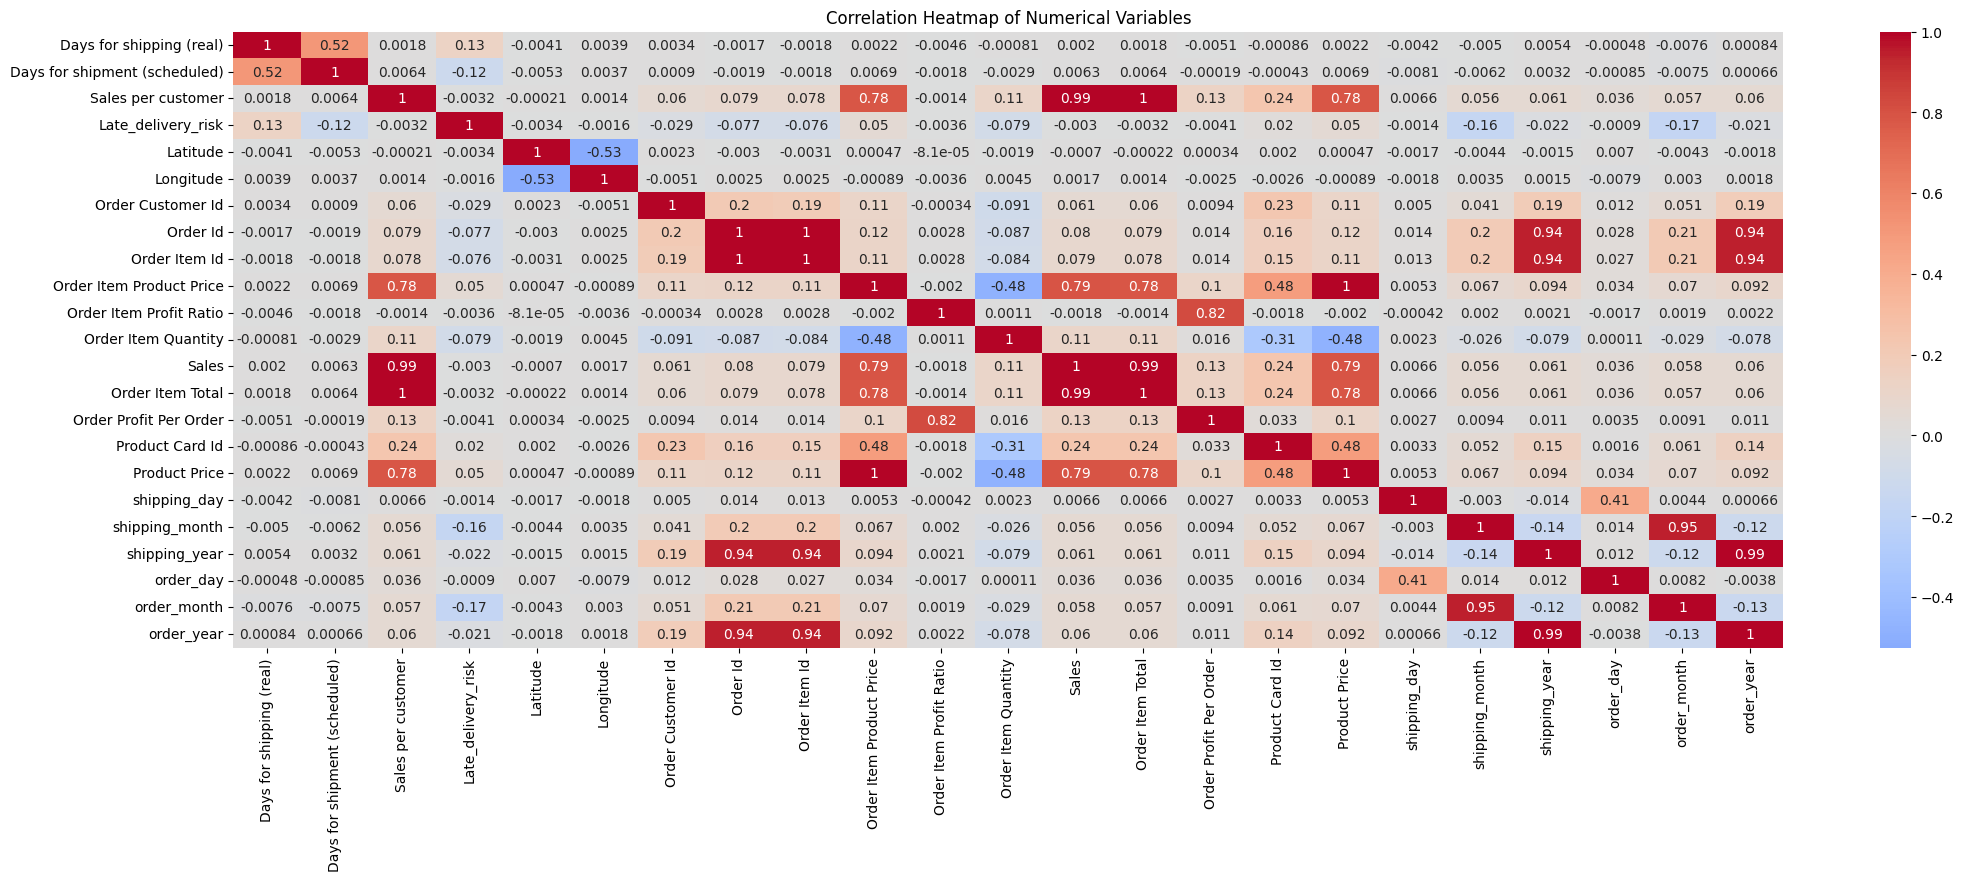

In [38]:
# Get the numerical columns from the DataFrame
numerical_columns = ds.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(25, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [93]:
late_delivery_risk = ds['Late_delivery_risk']
days_for_ship_sched = ds['Days for shipment (scheduled)']

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(days_for_ship_sched[late_delivery_risk == 'low'],
                                days_for_ship_sched[late_delivery_risk == 'medium'],
                                days_for_ship_sched[late_delivery_risk == 'high'])

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Check for significance at a 0.05 significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between 'late_delivery_risk' and 'days_for_shipping'.")
else:
    print("There is no significant association between 'late_delivery_risk' and 'days_for_shipping'.")


One-way ANOVA Results:
F-statistic: nan
P-value: nan
There is no significant association between 'late_delivery_risk' and 'days_for_shipping'.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


While the statistical analysis does not reveal a significant association between the scheduled days for shipping and the late delivery risk, we choose to include this feature in the modeling process due to its potential influence on the predictor when combined with other relevant features.

In [42]:
ds.groupby(['Delivery Status','Late_delivery_risk'])['Order Id'].count().unstack()

Late_delivery_risk,0.0,1.0
Delivery Status,,
Late delivery,NaN,85578.0
Shipping on time,94941.0,NaN


In [90]:
# Count of 'Delivery Status' and 'Late_delivery_risk'
delivery_status_counts = ds.groupby(['Delivery Status', 'Late_delivery_risk']).size().reset_index(name='Count')

print(delivery_status_counts)


    Delivery Status  Late_delivery_risk  Count
0     Late delivery                 1.0  85578
1  Shipping on time                 0.0  94941


Modelling 

In [45]:

ds.dropna(subset=['Shipping Mode', 'Order Region', 'Type', 'Days for shipment (scheduled)', 'Order Item Quantity', 'Late_delivery_risk'], inplace=True)

X = ds[['Shipping Mode', 'Order Region', 'Type', 'Days for shipment (scheduled)', 'Order Item Quantity', 'shipping_day', 'shipping_month', 'shipping_year', 'order_day', 'order_month', 'order_year']]
y = ds['Late_delivery_risk']

In the above  step, we remove rows from the DataFrame where any of the specified columns ('Shipping Mode', 'Order Region', 'Type', 'Days for shipment (scheduled)', 'Order Item Quantity', 'Late_delivery_risk') have missing values (NaN). The 'dropna' function with the 'subset' parameter is used for this purpose.

In the subsequent step, we select the relevant columns from the 'ds' DataFrame to create the input features (X)  and the target variable (y). The input features (X) include columns like 'Shipping Mode', 'Order Region', 'Type', 'Days for shipment (scheduled)', 'Order Item Quantity', 'shipping_day', 'shipping_month', 'shipping_year', 'order_day', 'order_month', 'order_year', which will be used to train the model. The target variable (y) is 'Late_delivery_risk',
which indicates whether an order is at risk of late delivery or not.

In [46]:
#Define the preprocessing steps for numerical and categorical features
numeric_features = ['Days for shipment (scheduled)', 'Order Item Quantity', 'shipping_day', 'shipping_month', 'shipping_year', 'order_day', 'order_month', 'order_year']
numeric_transformer = StandardScaler()

categorical_features = ['Shipping Mode', 'Order Region', 'Type']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


The preprocessing steps for the numerical and categorical features  that will be used to prepare the data for the  model are defined . # StandardScaler transformation for numerical features . The 'StandardScaler' is used to standardize (normalize) the numerical features to have a mean of 0 and a standard deviation of 1. This is important to bring all features to the same scale and avoid  any bias towards features with larger values.# OneHotEncoder transformation for categorical features . The 'OneHotEncoder' is used to convert categorical variables into binary vectors. It creates a new binary feature for each category in the categorical feature, indicating whether that category is present (1) or not (0).

ColumnTransformer for preprocessing :   The 'ColumnTransformer' allows us to apply different preprocessing steps to different columns in the dataset.In this case, we have two transformers: one for the numerical features and one for the categorical features.  The 'num' transformer uses the 'numeric_transformer' on the columns specified in 'numeric_features', while the 'cat' transformer uses the 'categorical_transformer' on the columns specified in 'categorical_features'.


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The 'train_test_split' function is used to divide the dataset into two parts: a training set and a testing set.
The 'X' variable contains the input features, and 'y' contains the target variable (labels).The 'test_size=0.2' parameter specifies that 20% of the data will be used for testing, and 80% for training. The 'random_state=42' parameter ensures that the data is split in a reproducible way, meaning the same random split
will be obtained if the code is executed again with the same random_state value.


In [48]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In this step, we use the 'preprocessor' defined earlier to preprocess the input features of both the training and test datasets. The 'preprocessor.fit_transform' function is used to apply the preprocessing steps to the 'X_train' dataset. This function fits the transformers to the training data and then transforms the training data accordingly. The result is stored in 'X_train_preprocessed', which now contains the preprocessed numerical and categorical features.
X_train_preprocessed = preprocessor.fit_transform(X_train). The 'preprocessor.transform' function is used to apply the same preprocessing steps to the 'X_test' dataset. Since we don't want to fit the transformers to the test data (to avoid data leakage), we only transform the test data.The preprocessed test data is stored in 'X_test_preprocessed'.


 **Building Classification Models**

In this step, we build four different classification models: Logistic Regression, Decision Tree, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). These models will be trained and evaluated on the preprocessed training and test datasets.The classifiers for each model are initialized with default hyperparameters.We loop through the list of models and for each model, we Create a pipeline that combines the preprocessing steps using the 'preprocessor' defined earlier  with the classifier for the current model. We the Fit the pipeline on the training data and make predictions on the test data. Tben we Evaluate the model's performance using accuracy and classification report metrics.

In [49]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier())
]

for name, model in models:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Step 5: Evaluate the models
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("---------------------")


Model: Logistic Regression
Accuracy: 0.6768
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70     19058
         1.0       0.67      0.64      0.65     17046

    accuracy                           0.68     36104
   macro avg       0.68      0.67      0.67     36104
weighted avg       0.68      0.68      0.68     36104

---------------------
Model: Decision Tree
Accuracy: 0.7675
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78     19058
         1.0       0.76      0.73      0.75     17046

    accuracy                           0.77     36104
   macro avg       0.77      0.77      0.77     36104
weighted avg       0.77      0.77      0.77     36104

---------------------
Model: Random Forest
Accuracy: 0.7537
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77     19058
    

 Accuracy: The accuracy of each model is given under the "Accuracy" section. It represents the overall percentage of correct predictions made by the model on the test data. Higher accuracy indicates better performance.

Precision, Recall, and F1-score: The "Classification Report" provides metrics like precision, recall, and F1-score for each class (0 and 1). These metrics evaluate the model's performance on individual classes. Precision measures the proportion of true positive predictions over all positive predictions, while recall measures the proportion of true positive predictions over all actual positive samples. F1-score is the harmonic mean of precision and recall, which gives a balance between the two. Higher values for precision, recall, and F1-score indicate better performance for a particular class.

Support: The "Support" column in the classification report represents the number of samples in each class in the test dataset.

Model Comparison: Comparing the performance metrics (accuracy, precision, recall, and F1-score) of different models, we can see that the Decision Tree model has the highest accuracy (0.7675) among the four models. It also has the highest F1-score for class 0 and a slightly lower F1-score for class 1. The Support Vector Machine (SVM) and K-Nearest Neighbors (KNN) models have similar accuracy and F1-scores, while the Logistic Regression and Random Forest models perform slightly worse.

 Model Choice: Based on the given output, the Decision Tree model appears to be the best performer among the four models for the given task. 
 
The next best choice after the Decision Tree model appears to be the Support Vector Machine (SVM) model. The SVM model achieved an accuracy of 0.7119, which is the second-highest among the  models. Additionally, the SVM model has relatively high precision, recall, and F1-scores for both classes 0 and 1, indicating balanced performance across the classes.

Compared to the other two models (Logistic Regression and K-Nearest Neighbors), the SVM model shows better overall accuracy and F1-scores, making it a strong candidate as the next best choice after the Decision Tree.


HYPER PARAMETER TUNING 

Hyperparameter tuning -  logistic regression

Define the hyperparameter grid for logistic regression : We define a dictionary 'param_grid' that specifies the hyperparameter values to be tested during hyperparameter tuning.  For logistic regression, we are tuning three hyperparameters: 'C', 'penalty', and 'solver'. 'C' is the regularization strength, 'penalty' specifies the norm used in the regularization ('l2' for ridge regularization), and 'solver' determines the optimization algorithm for the logistic regression model.

In [50]:
param_grid = {
    'classifier__C': [ 0.1, 1],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear']
}

# Create the Logistic Regression pipeline
logreg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000))])

# Perform GridSearchCV for hyperparameter tuning
logreg_grid_search = GridSearchCV(logreg_pipe, param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_logreg = logreg_grid_search.best_params_
best_accuracy_logreg = logreg_grid_search.best_score_

print("Best parameters for Logistic Regression:")
print(best_params_logreg)
print(f"Best accuracy for Logistic Regression: {best_accuracy_logreg:.4f}")
print("---------------------")


Best parameters for Logistic Regression:
{'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.6769
---------------------


The best hyperparameters for the Logistic Regression model are C=1, penalty='l2', and solver='liblinear'. The model achieved an accuracy of approximately 67.69%.

 The best model obtained through GridSearchCV for Logistic Regression is used to make predictions on the test dataset (X_test). The predicted labels are stored in y_pred_test. The accuracy of the model's predictions on the test set is then calculated using the accuracy_score function and stored in the variable accuracy_test. 

In [51]:

y_pred_test = logreg_grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy on the test set: {accuracy_test:.4f}")


Accuracy on the test set: 0.6769


The Logistic Regression model, which was trained and tuned using GridSearchCV, achieved an accuracy of approximately 67.69% when making predictions on the test dataset. The accuracy metric represents the percentage of correctly predicted samples among all the samples in the test set. In this case, the model correctly predicted the target labels for approximately 67.69% of the samples in the test set. A higher accuracy score indicates better performance, and an accuracy of 0.6769 suggests that the model is making reasonably accurate predictions on the unseen test data.

Confusion Matrix:
[[13605  5453]
 [ 6214 10832]]


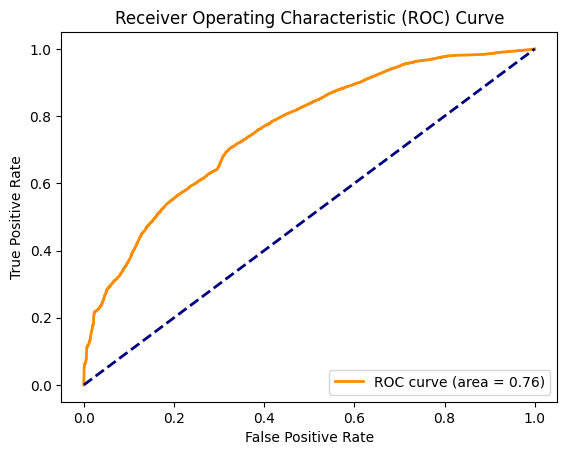

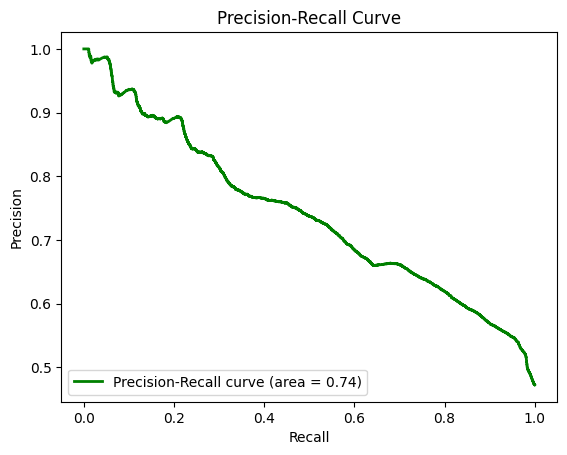

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)

# ROC Curve
y_pred_prob = logreg_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


Confusion Matrix:
   - The confusion matrix is a table that shows the performance of a classification model on a test dataset. It displays the number of true positives (correctly predicted positive samples), true negatives (correctly predicted negative samples), false positives (incorrectly predicted positive samples), and false negatives (incorrectly predicted negative samples). It helps in assessing the model's performance and identifying areas of improvement.


In the above  confusion matrix:

True Negative (TN): 13605
This represents the number of correctly predicted samples that belong to the negative class (class 0).
False Positive (FP): 5453
This represents the number of incorrectly predicted samples that belong to the positive class (class 1) but were predicted as negative (class 0).
False Negative (FN): 6214
This represents the number of incorrectly predicted samples that belong to the negative class (class 0) but were predicted as positive (class 1).
True Positive (TP): 10832
This represents the number of correctly predicted samples that belong to the positive class (class 1).

 ROC Curve (Receiver Operating Characteristic Curve):
   - The ROC curve is a graphical representation of the model's performance across various classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) as the discrimination threshold changes. The area under the ROC curve (ROC AUC) is a metric that quantifies the model's ability to distinguish between the positive and negative classes. A higher ROC AUC value indicates better model performance.

   ROC Curve Area (AUC = 0.76):
The ROC curve area (AUC) is 0.76, which is a measure of the model's ability to distinguish between the positive and negative classes across different classification thresholds.An AUC of 0.76 suggests that the model's performance in separating the two classes is better than random guessing. The higher the AUC value, the better the model's ability to distinguish between the positive and negative classes.

 Precision-Recall Curve:
   - The precision-recall curve is another graphical representation of the model's performance, particularly useful when dealing with imbalanced datasets. It plots the Precision (positive predictive value) against Recall (sensitivity) at various classification thresholds. The area under the precision-recall curve (PR AUC) quantifies the model's ability to make accurate positive predictions while minimizing false positives. A higher PR AUC value indicates better model performance, especially in cases with imbalanced classes.

   The Precision-Recall curve area (PR AUC) is 0.74, which evaluates the model's performance in making accurate positive predictions while minimizing false positives, particularly for imbalanced datasets . PR AUC suggests that the model has reasonably good precision (positive predictive value) and recall (sensitivity) across different classification thresholds.


In [59]:
cross_val_scores = cross_val_score(logreg_pipe, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean of cross-validation scores
cross_val_mean_score = cross_val_scores.mean()

print("Cross-Validation Scores:")
print(cross_val_scores)
print(f"Cross-Validation Mean Score: {cross_val_mean_score:.4f}")

Cross-Validation Scores:
[0.67537998 0.67634941 0.67835751 0.67659177 0.67804591]
Cross-Validation Mean Score: 0.6769


Consistency: The cross-validation scores are relatively close to each other, indicating that the model's performance is relatively consistent across different folds of the data.
Model Performance: The cross-validation mean score of 0.6769 represents the average performance of the model across all folds. This value gives an estimate of the model's generalization ability. A higher mean score suggests a better-performing model.
Variability: The slight variation in the cross-validation scores (e.g., 0.675 to 0.678) suggests that the model's performance may vary slightly from one fold to another. However, the small range of scores indicates that the model is relatively stable.
Model Evaluation: Cross-validation is a robust method for estimating a model's performance because it assesses the model on multiple subsets of the data. It helps to mitigate the risk of overfitting and provides a more realistic evaluation of the model's capabilities on unseen data.
In the case of logreg cross-validation scores and mean score suggest that the model is performing moderately well, with a consistent and stable performance across different subsets of the data

Hyperparameter tuning -   Decision Tree 

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid for Decision Tree
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create the Decision Tree pipeline
dt_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', DecisionTreeClassifier())])

# Perform GridSearchCV for hyperparameter tuning
dt_grid_search = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_dt = dt_grid_search.best_params_
best_accuracy_dt = dt_grid_search.best_score_

print("Best parameters for Decision Tree:")
print(best_params_dt)
print(f"Best accuracy for Decision Tree: {best_accuracy_dt:.4f}")
print("---------------------")


Best parameters for Decision Tree:
{'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 10}
Best accuracy for Decision Tree: 0.7575
---------------------


Best accuracy for Decision Tree: 0.7575: The reported accuracy of 0.7575 represents the performance of the Decision Tree classifier with the best set of hyperparameters. This accuracy value indicates how well the model generalized to unseen data during the evaluation process. It is a measure of how many data points were correctly classified by the model over the total number of data points. Overall, this information suggests that the  hyperparameter configuration resulted in a Decision Tree model with an accuracy of approximately 75.75% on the evaluation dataset. 

In [54]:
# Assuming you have obtained the best model using GridSearchCV and stored it in dt_grid_search
y_pred_test_dt = dt_grid_search.predict(X_test)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Accuracy on the test set: {accuracy_test_dt:.4f}")



Accuracy on the test set: 0.7658


Accuracy = (Number of Correctly Classified Instances) / (Total Number of Instances)

The reported accuracy of 0.7658 indicates that the model correctly classified approximately 76.58% of the instances in the test set. In other words, out of all the examples in the test set, around 76.58% of them were predicted correctly by the model, while the remaining 23.42% were misclassified.

An accuracy of 0.7658 is reasonably good, but the performance of the model should always be considered in the context of the specific problem domain and the baseline accuracy. 

Cross validation - Decision Tree

In [73]:
# Calculate cross-validation scores
cv_scores_dt = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores:")
print(cv_scores_dt)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores_dt):.4f}")
print("---------------------")



Decision Tree Cross-Validation Scores:
[0.75695046 0.75847384 0.7601011  0.75317661 0.75781602]
Mean Cross-Validation Accuracy: 0.7573
---------------------


The Mean Cross-Validation Accuracy: 0.7573  indicates that the average accuracy of the Decision Tree model across all the folds is 0.7573. This mean cross-validation accuracy provides an estimate of the model's generalization performance on unseen data. A higher mean accuracy suggests a better-performing model.
The Decision Tree model has achieved relatively consistent accuracy across different subsets of the data, with a mean accuracy of approximately 75.73%

Confusion Matrix:
[[15094  3964]
 [ 4491 12555]]


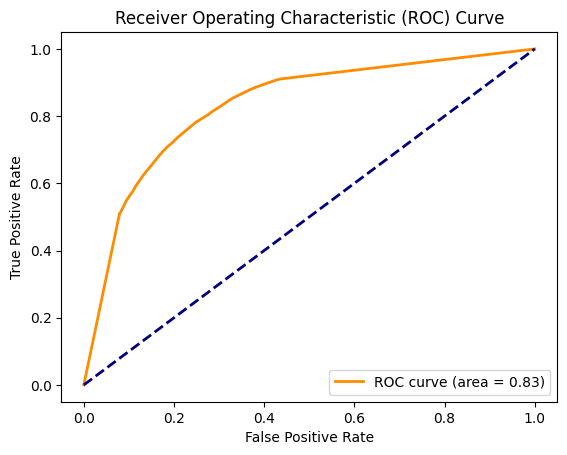

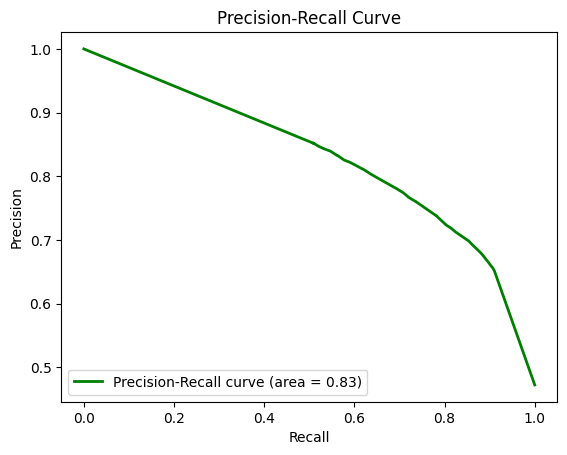

In [55]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_test_dt)
print("Confusion Matrix:")
print(cm_dt)

# ROC Curve
y_pred_prob_dt = dt_grid_search.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_prob_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

plt.figure()
plt.plot(recall_dt, precision_dt, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_dt)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



The confusion matrix states that there are :
- True Negatives (TN): 15094
- False Positives (FP): 3964
- False Negatives (FN): 4491
- True Positives (TP): 12555


the ROC curve area and AUC curve area both have a value of 0.83. This suggests that the model has a good ability to discriminate between the two classes (positive and negative), with an AUC of 0.83 being relatively high and indicating a reasonably effective classifier.


Hyperparameter tuning -  support vector machine 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define the hyperparameter grid for SVM
param_grid = {
    'classifier__C': [0.1, 1],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Create the SVM pipeline
svm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Perform GridSearchCV for hyperparameter tuning
svm_grid_search = GridSearchCV(svm_pipe, param_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params_svm = svm_grid_search.best_params_
best_accuracy_svm = svm_grid_search.best_score_

print("Best parameters for SVM:")
print(best_params_svm)
print(f"Best accuracy for SVM: {best_accuracy_svm:.4f}")
print("---------------------")


Best parameters for SVM:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best accuracy for SVM: 0.7088
---------------------


CROSS VALIDATION - SVM 

In [72]:
cv_scores_svm = cross_val_score(svm_grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy')

print("SVM Cross-Validation Scores:")
print(cv_scores_svm)
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores_svm):.4f}")
print("---------------------")

SVM Cross-Validation Scores:
[0.70802894 0.70775196 0.71384551 0.71142194 0.7116643 ]
Mean Cross-Validation Accuracy: 0.7105
---------------------


The mean cross validation accuracy is 71% which is comparatively lower than Decision tree and Logistic regression.

Calculating accuracy on the test set

In [57]:

best_svm_model = svm_grid_search.best_estimator_

y_pred_test_svm = best_svm_model.predict(X_test)

accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print(f"Accuracy on the test set: {accuracy_test_svm:.4f}")


Accuracy on the test set: 0.7119


Confusion Matrix:
[[14712  4346]
 [ 6056 10990]]


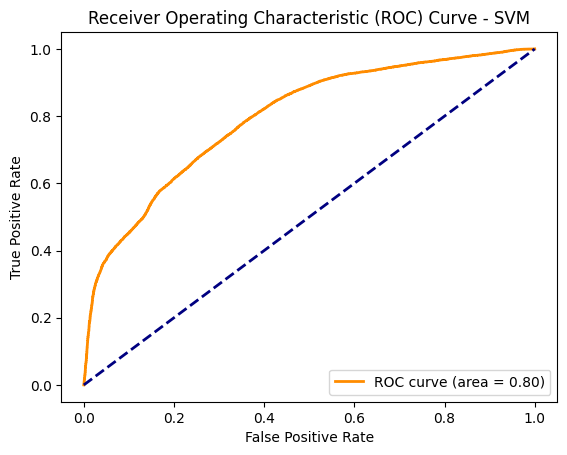

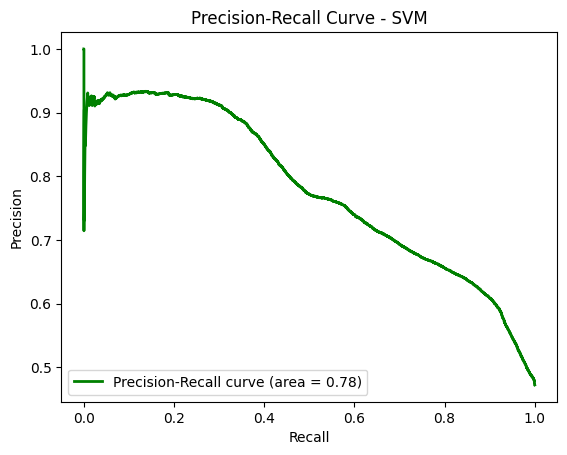

In [70]:

best_svm_model = svm_grid_search.best_estimator_

# Confusion Matrix
y_pred_test_svm = best_svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_test_svm)
print("Confusion Matrix:")
print(cm_svm)

# ROC Curve
try:
    y_pred_decision_svm = best_svm_model.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_decision_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)

    plt.figure()
    plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
    plt.legend(loc="lower right")
    plt.show()
except AttributeError:
    print("ROC Curve cannot be calculated because decision_function is not available for this SVM model.")

# Precision-Recall Curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_decision_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

plt.figure()
plt.plot(recall_svm, precision_svm, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_svm)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc="lower left")
plt.show()


SVM 

Cross-Validation Accuracy: 71%:
The SVM model achieved a cross-validation accuracy of 71%. This indicates that, on average, the model correctly classified around 71% of the instances in the test data during the cross-validation process. Accuracy is a common metric used to evaluate classification models, but it's essential to consider other performance metrics as well.

ROC Curve Area (AUC): 0.80:
The Receiver Operating Characteristic (ROC) curve is a graphical representation of the model's performance across different classification thresholds. The Area Under the ROC Curve (ROC AUC) is a single metric that quantifies the model's ability to distinguish between the positive and negative classes. An ROC AUC of 0.80 suggests that the SVM model has reasonably good discriminatory power, as it can distinguish between the two classes better than random guessing.

Precision-Recall Curve Area (PR AUC): 0.78:
The Precision-Recall (PR) curve is another performance metric for binary classification, particularly useful when dealing with imbalanced datasets. The Precision-Recall Curve Area (PR AUC) quantifies the model's ability to make accurate positive predictions while minimizing false positives. An PR AUC of 0.78 indicates that the SVM model has reasonably good precision (positive predictive value) and recall (sensitivity) across different classification thresholds.

The SVM model shows reasonable performance based on the provided metrics. It achieved a cross-validation accuracy of 71%, indicating that it correctly classified a substantial portion of the test instances. The ROC AUC of 0.80 suggests that the SVM model can distinguish between positive and negative instances reasonably well. Additionally, the PR AUC of 0.78 indicates that the model performs well in making accurate positive predictions while controlling for false positives, making it suitable for imbalanced datasets.


Hyperparameter tuning -   KNN 

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Define the pipeline with preprocessor and KNearest Neighbors classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

# Define hyperparameters for KNN
param_grid = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_clf = grid_search.best_estimator_

# Fit the best model on the training data
best_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("KNearest Neighbors (KNN):")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print("---------------------")


KNearest Neighbors (KNN):
Best Parameters: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Accuracy: 0.7382
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76     19058
         1.0       0.73      0.70      0.72     17046

    accuracy                           0.74     36104
   macro avg       0.74      0.74      0.74     36104
weighted avg       0.74      0.74      0.74     36104

---------------------


In [71]:
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


Cross-Validation Scores: [0.72765987 0.72700204 0.73056815 0.72464772 0.72928712]
Mean Cross-Validation Accuracy: 0.7278


The mean cross validation score is better than SVM but lower than decision tree .

Confusion Matrix:
[[14741  4317]
 [ 5135 11911]]


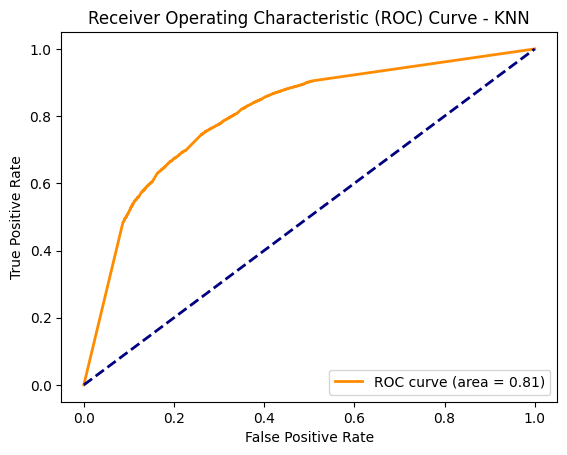

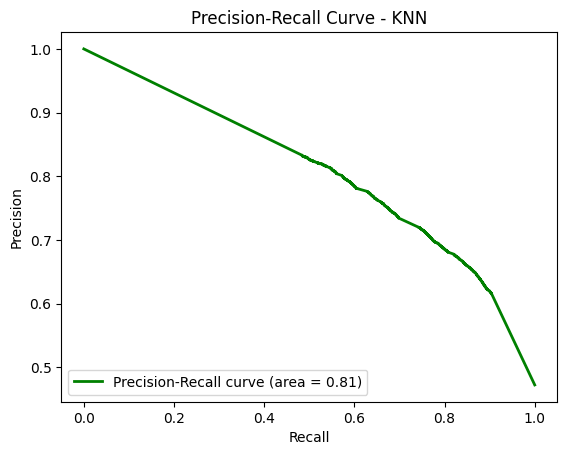

In [67]:
#  Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_knn)

# ROC Curve
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc_knn = auc(recall_knn, precision_knn)

plt.figure()
plt.plot(recall_knn, precision_knn, color='green', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_knn)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend(loc="lower left")
plt.show()

Confusion Matrix:

The confusion matrix is divided into four cells representing different scenarios:
- True Positives (TP): 11911 - The number of instances correctly predicted as positive.
- True Negatives (TN): 14741 - The number of instances correctly predicted as negative.
- False Positives (FP): 4317 - The number of instances incorrectly predicted as positive (Type I error).
- False Negatives (FN): 5135 - The number of instances incorrectly predicted as negative (Type II error).

ROC Curve Area = 0.81:
The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) for different classification thresholds. The area under the ROC curve (ROC AUC) is a single metric that quantifies the overall performance of the model across all possible thresholds. An ROC AUC value of 0.81 indicates that the model has a good discriminatory ability, as it can distinguish between the positive and negative classes reasonably well.

Precision-Recall Curve = 0.81:
The Precision-Recall (PR) curve is another performance metric for binary classification that illustrates the trade-off between precision and recall for different classification thresholds. The Precision-Recall curve AUC value of 0.81 indicates that the model has good precision and recall, meaning it can accurately classify positive instances while minimizing false positives.

This  suggests that the KNN classification model has achieved a reasonably good performance. The model shows a good ability to correctly identify positive and negative instances, as evidenced by the high values for precision, recall, and the area under both the ROC curve and the Precision-Recall curve.

**CONCLUSION**

After performing hyper parameter tuning and cross validation it is seen the decision tree model and KNN model perform better after optimisation. 


Based on the provided information, we can compare the performance of each model as follows

Recap of the metrics for each model:

1. Logistic Regression:
   - Cross-Validation Accuracy: 67%
   - ROC Curve Area (AUC): 0.76
   - Precision-Recall Curve Area (PR AUC): 0.74

2. Decision Tree:
   - Cross-Validation Accuracy: 75%
   - ROC Curve Area (AUC): 0.83
   - Precision-Recall Curve Area (PR AUC): 0.83

3. SVM:
   - Cross-Validation Accuracy: 71%
   - ROC Curve Area (AUC): 0.80
   - Precision-Recall Curve Area (PR AUC): 0.78

4. KNN:
   - Cross-Validation Accuracy: 72.78%
   - ROC Curve Area (AUC): 0.81
   - Precision-Recall Curve Area (PR AUC): 0.81

Based on the cross-validation accuracy alone, the Decision Tree model appears to have the highest performance with an accuracy of 75%. However, it's important to consider other metrics like ROC AUC and PR AUC, which provide additional insights into the model's discrimination and precision-recall trade-offs.

Both the Decision Tree and KNN models seem to have comparable ROC AUC and PR AUC values, suggesting they perform similarly in distinguishing between classes and achieving good precision-recall balance. SVM also shows a reasonable ROC AUC and PR AUC, while Logistic Regression has the lowest AUC values.

The Decision Tree and KNN models have shown better overall performance based on the provided metrics. The final choice between these two models may depend on other factors such as interpretability, ease of implementation, computational requirements, and specific requirements of the problem.

With the revised PR AUC for the Decision Tree model being 0.83, both the Decision Tree and KNN models have a similar PR AUC value. The Decision Tree model still has the highest cross-validation accuracy and a competitive ROC AUC value. It appears to be the best-performing model among the four based on the provided metrics.

Again, it's essential to consider other factors like interpretability, computational complexity, and the specific requirements of the problem when choosing the best model for a particular application. Additionally, it's always a good practice to explore and evaluate models using multiple performance metrics to gain a comprehensive understanding of their strengths and weaknesses.



Based on cross validation and performance metrics:

Decision Tree and KNN models have shown better overall performance based on cross-validation accuracy, ROC AUC, and PR AUC values compared to Logistic Regression and SVM models.

Both the Decision Tree and KNN models have comparable ROC AUC and PR AUC values, suggesting they perform similarly in distinguishing between classes and achieving a good precision-recall balance.

The Decision Tree model stands out as it has the highest cross-validation accuracy (75%) and a competitive ROC AUC value (0.83) after considering the revised PR AUC value (0.83) for precision-recall trade-offs.

Overall analysis  suggests that the Decision Tree model is the best-performing model among the four based on the given metrics. However, a comprehensive evaluation, considering all relevant factors and additional performance metrics, will ensure a more informed decision for the final model selection.

The final choice between the Decision Tree and KNN models may depend on other factors such as interpretability, ease of implementation, computational requirements, and specific needs of the business problem.



In conclusion, this report has delved into the critical issue of predicting the risk of late deliveries in the supply chain and has provided valuable insights based on comprehensive research and analysis.  Based on the research outcomes, we propose several key recommendations to proactively address the risk of late deliveries.

 Firstly, implementing advanced predictive analytics and machine learning algorithms can empower organizations to forecast potential disruptions and take preventive actions. Real-time data monitoring and analysis will enable swift identification of emerging issues, facilitating timely interventions and minimizing the impact of delays. 
 


Secondly, fostering collaboration and information-sharing among supply chain stakeholders is essential. Establishing strong partnerships with suppliers, carriers, and distributors allows for improved communication, streamlined processes, and joint problem-solving. Regular meetings and data exchanges will promote transparency and agility within the supply chain, fostering a proactive approach to risk management. 
 


Thirdly, investing in robust contingency plans and flexible logistics strategies is paramount. By anticipating potential bottlenecks and creating alternative routes and storage options, companies can respond swiftly to unforeseen events and maintain a smoother flow of goods throughout the supply chain. 
Furthermore, enhancing the visibility of the supply chain through the adoption of technology-driven tracking and monitoring systems can significantly improve risk prediction. Real-time tracking of shipments and inventory will enable quick identification of deviations from the planned schedule, leading to proactive measures to address issues promptly. 



 
Lastly, continuous evaluation and improvement of supply chain processes are vital for long-term success. Regular performance assessments, root cause analyses, and feedback loops will facilitate a data-driven approach to risk management, fostering a culture of continuous improvement and adaptability. 


In conclusion, by implementing the above recommendations, organizations can better predict and mitigate the risk of late deliveries, ultimately enhancing their supply chain efficiency, customer satisfaction, and overall competitiveness in the market. Embracing these proactive strategies will enable companies to navigate challenges with greater resilience and fortify their position in an ever-evolving and dynamic business landscape. 
 
